# **Extracción del Archivo Tratado**

## Carga el archivo CSV que contiene los datos tratados anteriormente

In [10]:
from google.colab import drive
import pandas as pd
import os

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_limpios_sin_columnas_vacias.csv')


🔎 Iniciando análisis del DataFrame...

🔍 ANÁLISIS COMPLETO DEL DATASET

📐 ESTRUCTURA DEL DATASET:
- Dimensiones: (7267, 21) (filas, columnas)
- Columnas:
['customerID',
 'Churn',
 'customer',
 'phone',
 'internet',
 'account',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'account_dict',
 'Charges.Monthly',
 'Charges.Total',
 'tenure',
 'Churn_binary',
 'Churn_missing',
 'Churn_clean',
 'tenure_group',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

- Tipos de datos por columna:
{'Charges.Monthly': dtype('float64'),
 'Charges.Total': dtype('float64'),
 'Churn': dtype('O'),
 'Churn_binary': dtype('int64'),
 'Churn_clean': dtype('O'),
 'Churn_missing': dtype('int64'),
 'Contract': dtype('O'),
 'Dependents': dtype('O'),
 'PaperlessBilling': dtype('O'),
 'Partner': dtype('O'),
 'PaymentMethod': dtype('O'),
 'SeniorCitizen': dtype('int64'),
 'account': dtype('O'),
 'account_dict': dtype('O'),
 'customer': dtype('O'),
 'customerID': dtype('O'),
 'gender': dtype('O'),
 'intern

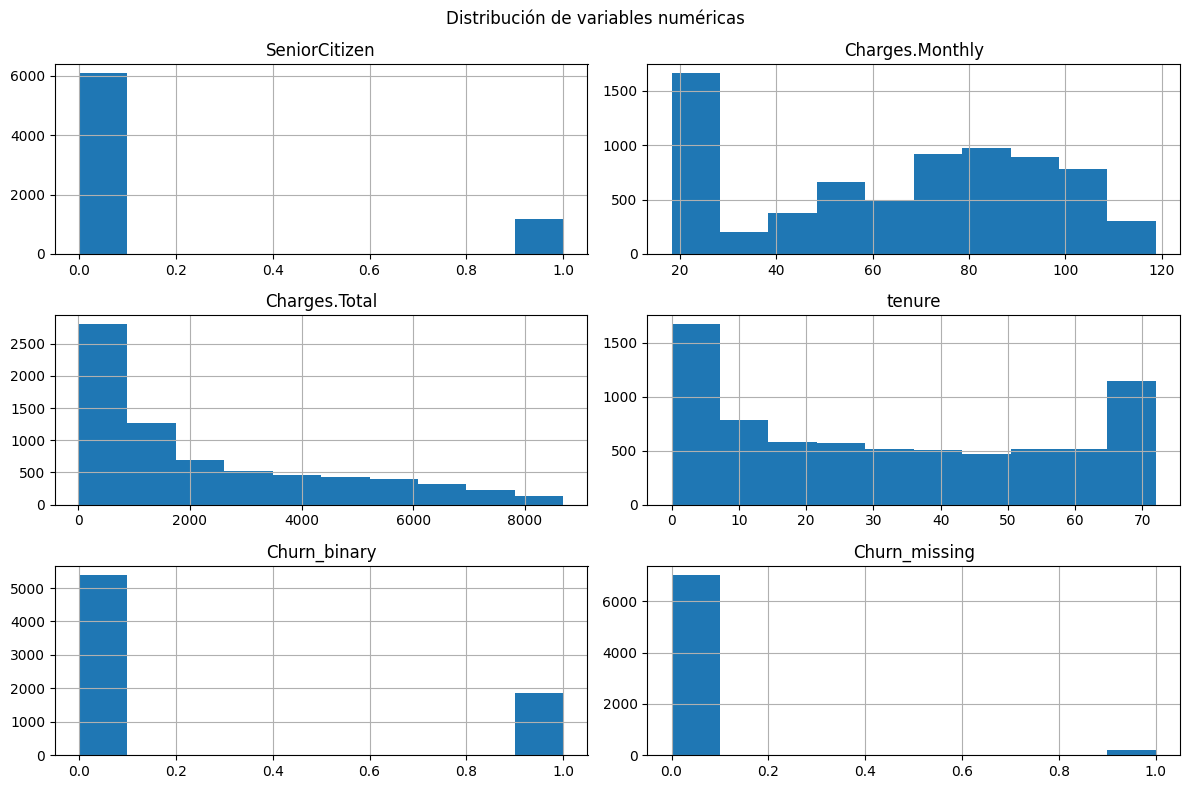

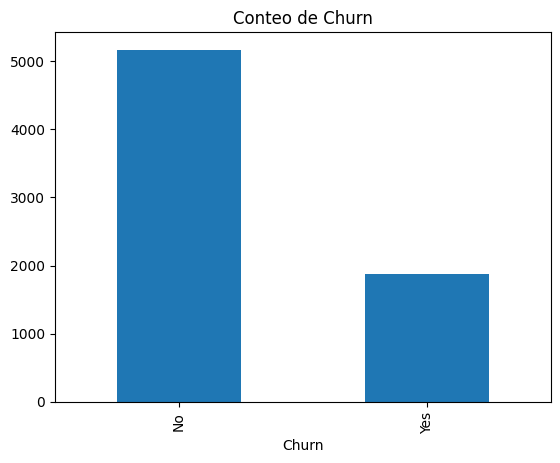

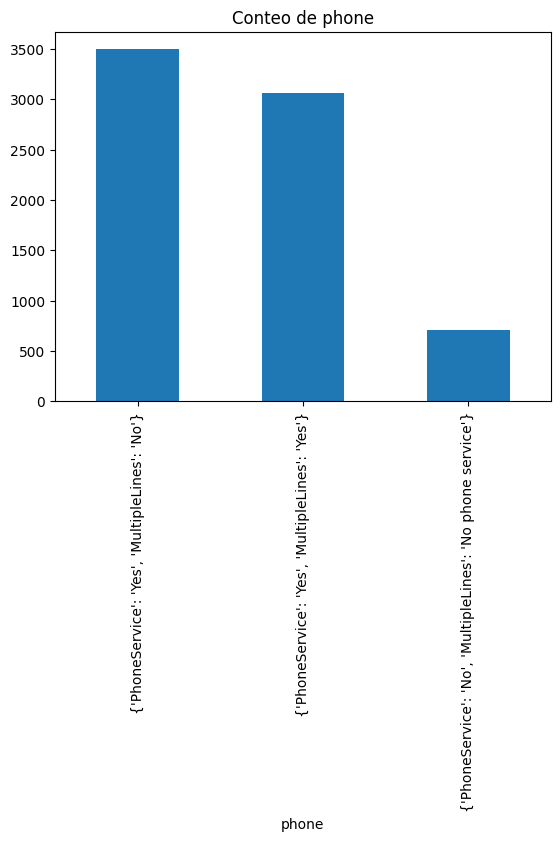

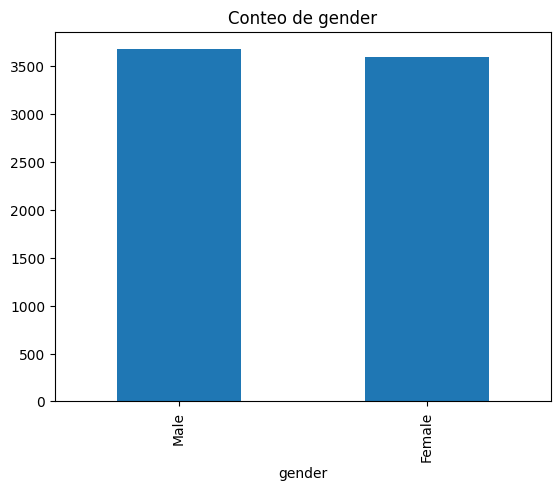

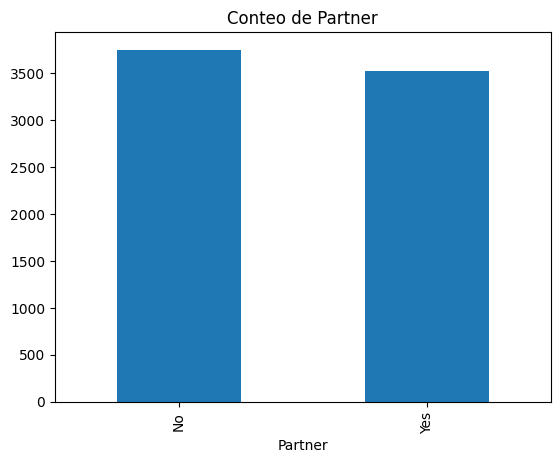

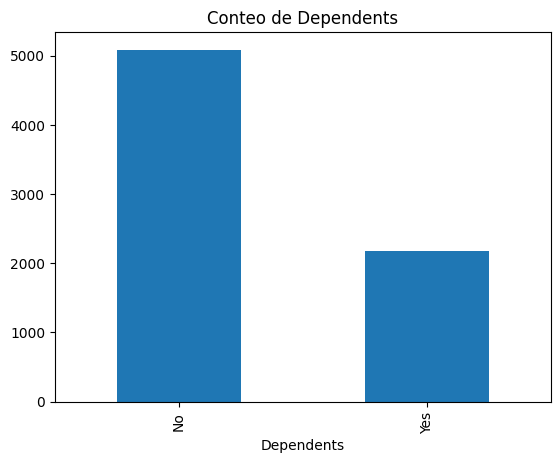

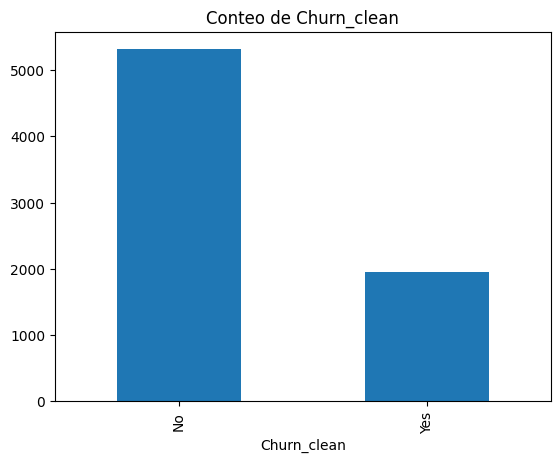

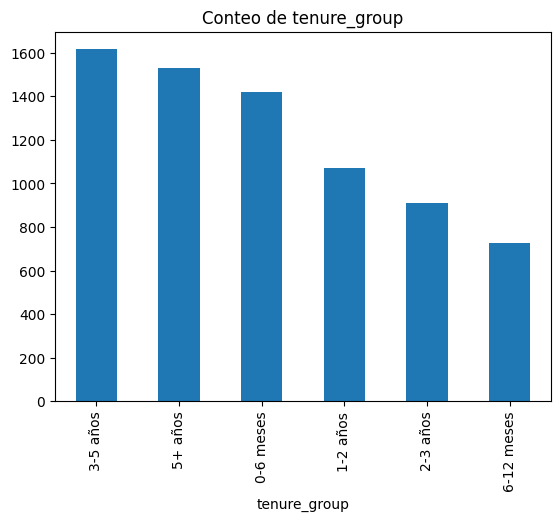

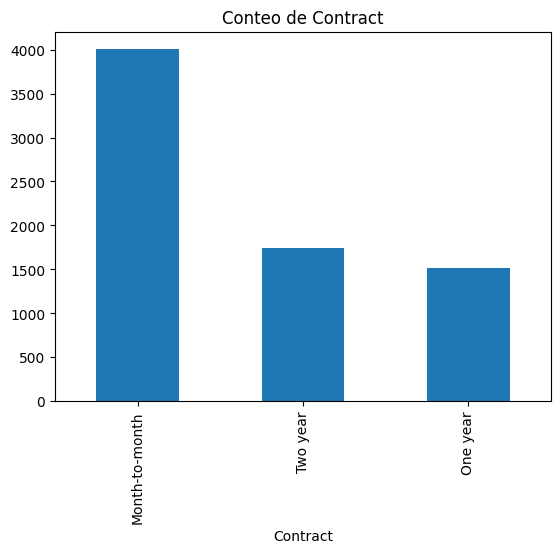

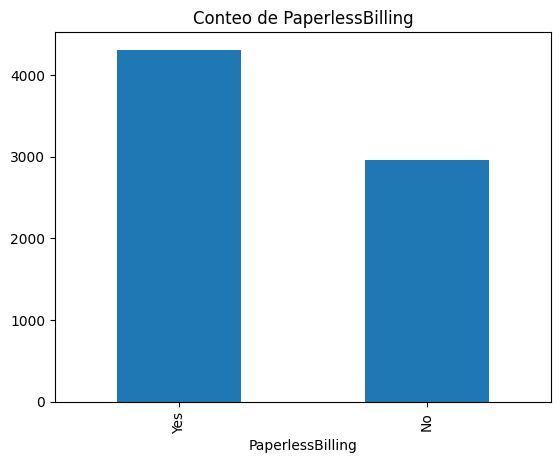

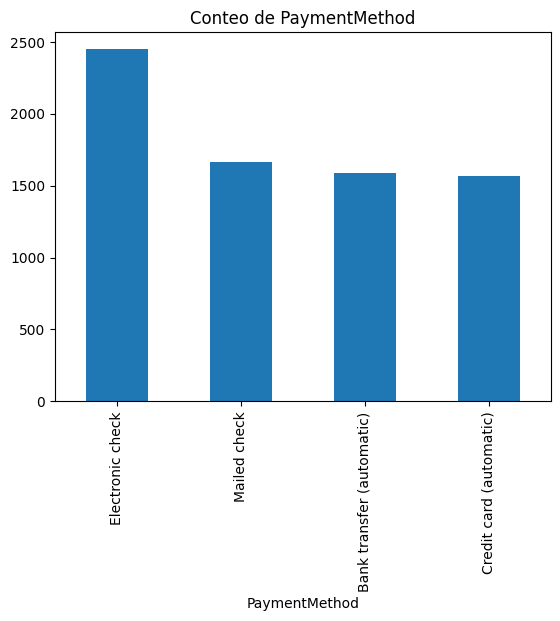

In [12]:
def verificar_contenido_dataframe(df):
    """
    Realiza un análisis completo del DataFrame cargado.

    Args:
        df (pd.DataFrame): DataFrame a analizar

    Returns:
        dict: Diccionario con los resultados del análisis
    """
    if df.empty:
        raise ValueError("El DataFrame está vacío")

    analysis = {
        'estructura': {},
        'estadisticas': {},
        'calidad_datos': {},
        'muestra_datos': {}
    }

    try:
        # 1. Análisis de estructura básica
        analysis['estructura']['dimensiones'] = df.shape
        analysis['estructura']['columnas'] = list(df.columns)
        analysis['estructura']['tipos_datos'] = df.dtypes.to_dict()

        # 2. Estadísticas descriptivas
        analysis['estadisticas']['describe_numerico'] = df.describe(include='number').to_dict()
        analysis['estadisticas']['describe_categorico'] = df.describe(include='object').to_dict()

        # 3. Análisis de calidad de datos
        analysis['calidad_datos']['valores_faltantes'] = df.isna().sum().to_dict()
        analysis['calidad_datos']['filas_duplicadas'] = df.duplicated().sum()
        analysis['calidad_datos']['valores_unicos'] = {col: df[col].nunique() for col in df.columns}

        # 4. Muestra de datos
        analysis['muestra_datos']['primeras_filas'] = df.head(3).to_dict('records')
        analysis['muestra_datos']['filas_aleatorias'] = df.sample(3).to_dict('records')
        analysis['muestra_datos']['ultimas_filas'] = df.tail(3).to_dict('records')

        return analysis

    except Exception as e:
        print(f"Error durante el análisis: {str(e)}")
        raise

def mostrar_analisis(analysis):
    """Muestra los resultados del análisis de forma organizada"""
    from pprint import pprint

    print("\n🔍 ANÁLISIS COMPLETO DEL DATASET")
    print("="*50)

    print("\n📐 ESTRUCTURA DEL DATASET:")
    print(f"- Dimensiones: {analysis['estructura']['dimensiones']} (filas, columnas)")
    print("- Columnas:")
    pprint(analysis['estructura']['columnas'])
    print("\n- Tipos de datos por columna:")
    pprint(analysis['estructura']['tipos_datos'])

    print("\n📊 ESTADÍSTICAS BÁSICAS:")
    print("\nVariables numéricas:")
    pprint(analysis['estadisticas']['describe_numerico'])
    print("\nVariables categóricas:")
    pprint(analysis['estadisticas']['describe_categorico'])

    print("\n🧹 CALIDAD DE LOS DATOS:")
    print("\n- Valores faltantes por columna:")
    pprint(analysis['calidad_datos']['valores_faltantes'])
    print(f"- Filas duplicadas: {analysis['calidad_datos']['filas_duplicadas']}")
    print("\n- Valores únicos por columna:")
    pprint(analysis['calidad_datos']['valores_unicos'])

    print("\n👀 MUESTRA DE DATOS:")
    print("\n- Primeras 3 filas:")
    pprint(analysis['muestra_datos']['primeras_filas'])
    print("\n- 3 filas aleatorias:")
    pprint(analysis['muestra_datos']['filas_aleatorias'])
    print("\n- Últimas 3 filas:")
    pprint(analysis['muestra_datos']['ultimas_filas'])

# Ejecutar el análisis completo

try:
    if 'df' in globals():
        print("🔎 Iniciando análisis del DataFrame...")
        analisis = verificar_contenido_dataframe(df)
        mostrar_analisis(analisis)

        # Generar reporte visual adicional
        import matplotlib.pyplot as plt

        print("\n📈 VISUALIZACIONES RÁPIDAS:")
        # Histogramas para columnas numéricas
        numeric_cols = df.select_dtypes(include='number').columns
        if len(numeric_cols) > 0:
            df[numeric_cols].hist(figsize=(12, 8))
            plt.suptitle('Distribución de variables numéricas')
            plt.tight_layout()
            plt.show()
        else:
            print("No hay columnas numéricas para graficar histogramas")

        # Conteo de valores para columnas categóricas (mostrar solo las top 10)
        categorical_cols = df.select_dtypes(include='object').columns
        if len(categorical_cols) > 0:
            for col in categorical_cols:
                if df[col].nunique() < 20:  # Solo para categorías con pocos valores
                    df[col].value_counts().plot(kind='bar', title=f'Conteo de {col}')
                    plt.show()
        else:
            print("No hay columnas categóricas para graficar")

    else:
        print("No se encontró el DataFrame 'datos'. Por favor carga primero tu archivo CSV.")

except Exception as e:
    print(f"Error durante el análisis: {str(e)}")


# **Eliminación de Columnas Irrelevantes**

## Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente).

In [15]:
def eliminar_columnas_no_informativas(df):
    """
    Elimina columnas que no aportan valor al análisis predictivo.

    Args:
        df (pd.DataFrame): DataFrame a limpiar

    Returns:
        pd.DataFrame: DataFrame limpio
    """
    try:
        # Hacer copia para no modificar el original
        df_clean = df.copy()

        # 1. Identificar columnas a eliminar
        columnas_a_eliminar = [
            'customerID',        # Identificador único (no predictivo)
            'account',          # Información de cuenta (redundante)
            'account_dict',     # Datos en formato dict (no usable directamente)
            'customer',        # Información de cliente (redundante)
            'Churn_missing',    # Columna técnica sobre datos faltantes
            'Churn_clean',     # Versión alternativa de Churn (usaremos Churn_binary)
            'Churn'            # Versión string de Churn (usaremos Churn_binary)
        ]

        # 2. Verificar qué columnas existen realmente en el DataFrame
        columnas_existentes = [col for col in columnas_a_eliminar if col in df_clean.columns]

        # 3. Eliminar columnas
        df_clean = df_clean.drop(columns=columnas_existentes)

        # 4. Validación post-limpieza
        columnas_restantes = set(df_clean.columns)
        columnas_eliminadas = set(columnas_a_eliminar) & set(df.columns)

        print("✅ Limpieza completada exitosamente!")
        print(f"🗑️ Columnas eliminadas: {columnas_eliminadas}")
        print(f"📊 Columnas restantes: {list(df_clean.columns)}")
        print(f"🔢 Nueva dimensionalidad: {df_clean.shape}")

        return df_clean

    except Exception as e:
        print(f"❌ Error durante la limpieza: {str(e)}")
        raise

# Ejecutar la limpieza
try:
    if 'df' in globals():
        print("🧹 Iniciando limpieza de columnas no informativas...")
        datos_limpios = eliminar_columnas_no_informativas(df)

        # Mostrar resultado
        print("\n🔍 Vista previa del DataFrame limpio:")
        display(datos_limpios.head())

        # Verificación de tipos de datos después de la limpieza
        print("\n📝 Tipos de datos actualizados:")
        print(datos_limpios.dtypes)
    else:
        print("No se encontró el DataFrame 'datos'. Por favor carga primero tu archivo CSV.")
except Exception as e:
    print(f"Error durante el proceso de limpieza: {str(e)}")

# Verificación post-limpieza
if 'datos_limpios' in globals():
    print("\n🔎 Verificación final:")
    print(f"- Porcentaje de valores nulos por columna:")
    print(datos_limpios.isnull().mean().round(4) * 100)

    print(f"\n- Estadísticas descriptivas básicas:")
    display(datos_limpios.describe(include='all'))

🧹 Iniciando limpieza de columnas no informativas...
✅ Limpieza completada exitosamente!
🗑️ Columnas eliminadas: {'Churn_missing', 'Churn_clean', 'Churn', 'customerID', 'customer', 'account_dict', 'account'}
📊 Columnas restantes: ['phone', 'internet', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Charges.Monthly', 'Charges.Total', 'tenure', 'Churn_binary', 'tenure_group', 'Contract', 'PaperlessBilling', 'PaymentMethod']
🔢 Nueva dimensionalidad: (7267, 14)

🔍 Vista previa del DataFrame limpio:


phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  gender  SeniorCitizen  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...  Female              0   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...    Male              0   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              0   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...    Male              1   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...  Female              1   

  Partner Dependents  Charges.Monthly  Charges.Total  tenure  Churn_binary  \
0     Yes        Yes             65.6         593.30       9             0   
1      No         No             59.9         542.40       9             0   
2      No         No             73.9         280.85       4             1   
3     Yes         No             98.0        1237.85      13             1   
4     Yes         No             83.9         267.40       3             1   

  tenure_group        Contract PaperlessBilling     PaymentMethod  
0   6-12 meses        One year              Yes      Mailed check  
1   6-12 meses  Month-to-month               No      Mailed check  
2    0-6 meses  Month-to-month              Yes  Electronic check  
3     1-2 años  Month-to-month              Yes  Electronic check  
4    0-6 meses  Month-to-month              Yes      Mailed check


📝 Tipos de datos actualizados:
phone                object
internet             object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Charges.Monthly     float64
Charges.Total       float64
tenure                int64
Churn_binary          int64
tenure_group         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
dtype: object

🔎 Verificación final:
- Porcentaje de valores nulos por columna:
phone               0.00
internet            0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
Charges.Monthly     0.00
Charges.Total       0.15
tenure              0.00
Churn_binary        0.00
tenure_group        0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
dtype: float64

- Estadísticas descriptivas básicas:


phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   
mean                                               NaN   
std                                                NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   

                                                 internet gender  \
count                                                7267   7267   
unique                                                129      2   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   Male   
freq                                                 1581   3675   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

        SeniorCitizen Partner Dependents  Charges.Monthly  Charges.Total  \
count     7267.000000    7267       7267      7267.000000    7256.000000   
unique            NaN       2          2              NaN            NaN   
top               NaN      No         No              NaN            NaN   
freq              NaN    3749       5086              NaN            NaN   
mean         0.162653     NaN        NaN        64.720098    2280.634213   
std          0.369074     NaN        NaN        30.129572    2268.632997   
min          0.000000     NaN        NaN        18.250000      18.800000   
25%          0.000000     NaN        NaN        35.425000     400.225000   
50%          0.000000     NaN        NaN        70.300000    1391.000000   
75%          0.000000     NaN        NaN        89.875000    3785.300000   
max          1.000000     NaN        NaN       118.750000    8684.800000   

             tenure  Churn_binary tenure_group        Contract  \
count   7267.000000   7267.000000         7267            7267   
unique          NaN           NaN            6               3   
top             NaN           NaN     3-5 años  Month-to-month   
freq            NaN           NaN         1616            4005   
mean      32.346498      0.257190          NaN             NaN   
std       24.571773      0.437115          NaN             NaN   
min        0.000000      0.000000          NaN             NaN   
25%        9.000000      0.000000          NaN             NaN   
50%       29.000000      0.000000          NaN             NaN   
75%       55.000000      1.000000          NaN             NaN   
max       72.000000      1.000000          NaN             NaN   

       PaperlessBilling     PaymentMethod  
count              7267              7267  
unique                2                 4  
top                 Yes  Electronic check  
freq               4311              2445  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

In [21]:
import io

def exportar_dataframe_a_csv(df, nombre_archivo='datos_limpios_analisis.csv'):
    """
    Exporta un DataFrame a un archivo CSV con configuraciones óptimas.

    Args:
        df (pd.DataFrame): DataFrame a exportar
        nombre_archivo (str): Nombre del archivo de salida

    Returns:
        None: Descarga el archivo directamente
    """
    try:
        # Validación del DataFrame
        if df.empty:
            raise ValueError("El DataFrame está vacío, no se puede exportar")

        # Configuración de parámetros óptimos para CSV
        kwargs = {
            'index': False,          # No incluir índice
            'encoding': 'utf-8',     # Codificación estándar
            'sep': ',',              # Separador de columnas
            'quotechar': '"',        # Carácter para campos con comas
            'quoting': 1,            # Quote solo campos necesarios
            'float_format': '%.2f'   # Formato para números flotantes
        }

        # Crear archivo CSV en memoria
        csv_buffer = io.StringIO()
        df.to_csv(csv_buffer, **kwargs)

        # Descargar archivo desde Colab
        from google.colab import files
        files.download(nombre_archivo)

        # También guardar localmente en la sesión de Colab
        df.to_csv(nombre_archivo, **kwargs)

        print(f"✅ Archivo '{nombre_archivo}' generado exitosamente!")
        print("📊 Resumen del DataFrame exportado:")
        print(f"- Filas: {df.shape[0]}")
        print(f"- Columnas: {df.shape[1]}")
        print(f"- Tamaño estimado: {len(csv_buffer.getvalue()) / 1024:.2f} KB")

    except Exception as e:
        print(f"❌ Error al exportar el DataFrame: {str(e)}")
        raise

# Ejecutar exportación
try:
    if 'datos_limpios' in globals():
        print("🔄 Generando archivo CSV con datos limpios...")
        exportar_dataframe_a_csv(datos_limpios, 'datos_telecom_limpios_para_analisis.csv')

        # Guardar también en Google Drive
        from google.colab import drive
        drive.mount('/content/drive')

        ruta_drive = '/content/drive/MyDrive/Colab Notebooks/datos_telecom_limpios_para_analisis.csv'
        datos_limpios.to_csv(ruta_drive, index=False)
        print(f"📌 Copia guardada en Google Drive: {ruta_drive}")
    else:
        print("No se encontró el DataFrame 'datos_limpios'. Ejecuta primero la limpieza de datos.")
except Exception as e:
    print(f"Error durante la exportación: {str(e)}")

🔄 Generando archivo CSV con datos limpios...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Archivo 'datos_telecom_limpios_para_analisis.csv' generado exitosamente!
📊 Resumen del DataFrame exportado:
- Filas: 7267
- Columnas: 14
- Tamaño estimado: 2469.54 KB
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📌 Copia guardada en Google Drive: /content/drive/MyDrive/Colab Notebooks/datos_telecom_limpios_para_analisis.csv


# **Encoding**

## Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [22]:
df_validacion = pd.read_csv('datos_telecom_limpios_para_analisis.csv')
print("🔍 Validación de carga:")
display(df_validacion.head(2))
print(f"Dimensiones: {df_validacion.shape}")

🔍 Validación de carga:


phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  gender  SeniorCitizen  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...  Female              0   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...    Male              0   

  Partner Dependents  Charges.Monthly  Charges.Total  tenure  Churn_binary  \
0     Yes        Yes             65.6          593.3       9             0   
1      No         No             59.9          542.4       9             0   

  tenure_group        Contract PaperlessBilling PaymentMethod  
0   6-12 meses        One year              Yes  Mailed check  
1   6-12 meses  Month-to-month               No  Mailed check

Dimensiones: (7267, 14)


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def transformar_categoricas(df):
    """
    Transforma variables categóricas a numéricas usando one-hot encoding.

    Args:
        df (pd.DataFrame): DataFrame con los datos limpios

    Returns:
        pd.DataFrame: DataFrame con variables transformadas
        ColumnTransformer: Transformador para aplicar en nuevos datos
    """
    try:
        # 1. Identificar columnas categóricas
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

        # 2. Configurar el transformador
        preprocessor = ColumnTransformer(
            transformers=[
                ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
            ],
            remainder='passthrough'
        )

        # 3. Aplicar la transformación
        transformed_data = preprocessor.fit_transform(df)

        # 4. Obtener nombres de las nuevas columnas
        onehot_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
        remaining_columns = [col for col in df.columns if col not in categorical_cols]
        new_columns = list(onehot_columns) + remaining_columns

        # 5. Crear nuevo DataFrame
        df_transformed = pd.DataFrame(transformed_data, columns=new_columns)

        # 6. Convertir tipos numéricos (one-hot crea float64 por defecto)
        for col in onehot_columns:
            df_transformed[col] = df_transformed[col].astype(int)

        print("✅ Transformación completada exitosamente!")
        print(f"🔢 Nueva dimensionalidad: {df_transformed.shape}")
        print(f"➕ Columnas añadidas: {len(onehot_columns)}")

        return df_transformed, preprocessor

    except Exception as e:
        print(f"❌ Error durante la transformación: {str(e)}")
        raise

# Ejecutar la transformación
try:
    if 'df_validacion' in globals():
        print("🔄 Transformando variables categóricas...")

        # Copia para no modificar el original
        df_encoded, encoder = transformar_categoricas(df_validacion)

        # Mostrar resultados
        print("\n🔍 Columnas resultantes:")
        print(df_encoded.columns.tolist())

        print("\n📊 Muestra de datos transformados:")
        display(df_encoded.head())

        # Guardar el dataframe transformado
        df_encoded.to_csv('datos_numericos_para_ml.csv', index=False)
        print("\n💾 Datos guardados en 'datos_numericos_para_ml.csv'")

    else:
        print("No se encontró el DataFrame 'datos_limpios'. Ejecuta primero la limpieza de datos.")
except Exception as e:
    print(f"Error durante la transformación: {str(e)}")

🔄 Transformando variables categóricas...
✅ Transformación completada exitosamente!
🔢 Nueva dimensionalidad: (7267, 149)
➕ Columnas añadidas: 144

🔍 Columnas resultantes:
["phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}", "phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'No'}",

phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}  \
0                                                  1      
1                                                  0      
2                                                  1      
3                                                  1      
4                                                  1      

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  \
0                                                  0       
1                                                  1       
2                                                  0       
3                                                  0       
4                                                  0       

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                 
1                                                  1                                                                                                                                 
2                                                  0                                                                                                                                 
3                                                  0                                                                                                                                 
4                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                                  0                                                                                                                                 
1                                                  0                                                                                                                                 
2                                                  0                                                                                                                                 
3                                                  0                                                                                                                                 
4                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                  
1                                                  0                                                                                                                                  
2                                                  0                                                                                                                                  
3                                                  0                                                                                                                                  
4                                                  0                                                                                                                                  

  


💾 Datos guardados en 'datos_numericos_para_ml.csv'


In [24]:
print("\n📌 Resumen de variables transformadas:")
print(f"- Variables originales: {len(datos_limpios.columns)}")
print(f"- Variables finales: {len(df_encoded.columns)}")
print(f"- Nuevas columnas one-hot: {len(df_encoded.columns) - len(datos_limpios.columns)}")


📌 Resumen de variables transformadas:
- Variables originales: 14
- Variables finales: 149
- Nuevas columnas one-hot: 135


In [25]:
df_transformados = pd.read_csv('datos_numericos_para_ml.csv')
print("🔍 Validación de carga:")
display(df_transformados.head(2))
print(f"Dimensiones: {df_transformados.shape}")

🔍 Validación de carga:


phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}  \
0                                                  1      
1                                                  0      

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  \
0                                                  0       
1                                                  1       

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                 
1                                                  1                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                                  0                                                                                                                                 
1                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                  
1                                                  0                                                                                                                                  

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'No'}  \
0                                                  0                                                                                                                                 
1                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                  
1                                                  0                                                                                                                                  

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                                  0                                                                                                                                  
1                                                  0                                                                                                                                  

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                     

Dimensiones: (7267, 149)


# **Verificación de la Proporción de Cancelación (Churn)**

## Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

📊 Distribución de Churn (Cancelación):


count  Proporción  Porcentaje
Churn_binary                                          
Clientes Activos          5398     0.74281       74.28
Clientes que Cancelaron   1869     0.25719       25.72

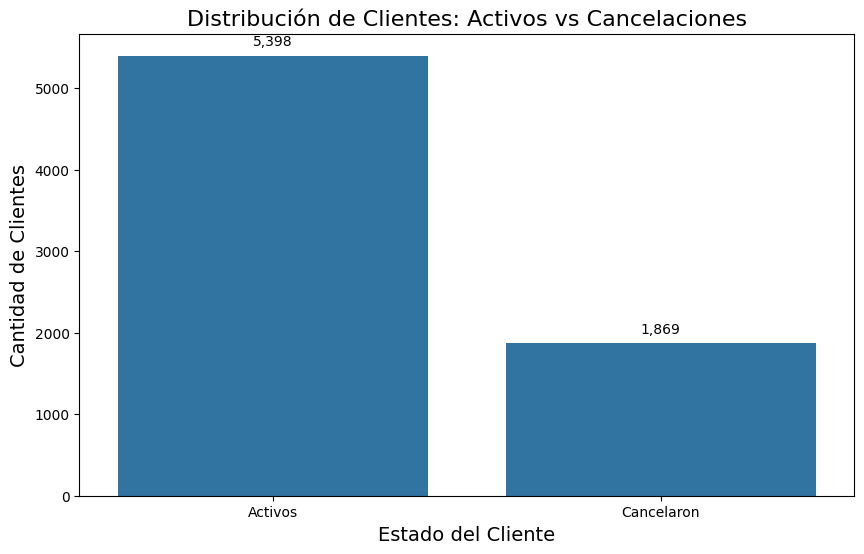


🔍 Ratio de desbalance: 2.89:1 (Activos:Cancelaciones)

ℹ️ Existe un desbalance moderado entre las clases.
Puede ser manejable pero conviene considerar técnicas de balanceo.


In [26]:
# Verificamos primero si existe el dataframe transformado
if 'df_transformados' in globals():
    # Asumimos que 'Churn_binary' es nuestra variable objetivo
    if 'Churn_binary' in df_transformados.columns:
        # Calculamos el conteo y proporción
        churn_distribution = df_transformados['Churn_binary'].value_counts().to_frame()
        churn_distribution['Proporción'] = df_transformados['Churn_binary'].value_counts(normalize=True)
        churn_distribution['Porcentaje'] = df_transformados['Churn_binary'].value_counts(normalize=True).mul(100).round(2)

        # Mostramos resultados
        print("📊 Distribución de Churn (Cancelación):")
        display(churn_distribution.rename(index={0: 'Clientes Activos', 1: 'Clientes que Cancelaron'}))

        # Visualización
        import matplotlib.pyplot as plt
        import seaborn as sns

        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df_transformados, x='Churn_binary')
        plt.title('Distribución de Clientes: Activos vs Cancelaciones', fontsize=16)
        plt.xlabel('Estado del Cliente', fontsize=14)
        plt.ylabel('Cantidad de Clientes', fontsize=14)
        plt.xticks([0, 1], ['Activos', 'Cancelaron'])

        # Añadir etiquetas con los valores
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,.0f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

        plt.show()

        # Análisis de balance
        ratio = churn_distribution.loc[0, 'count'] / churn_distribution.loc[1, 'count']
        print(f"\n🔍 Ratio de desbalance: {ratio:.2f}:1 (Activos:Cancelaciones)")

        # Evaluación del desbalance
        if ratio > 4:
            print("\n⚠️ ¡Alerta! Existe un desbalance significativo entre las clases (mayor a 4:1).")
            print("Esto puede causar que los modelos predictivos tengan sesgo hacia la clase mayoritaria.")
            print("\n💡 Recomendaciones:")
            print("- Considerar técnicas de balanceo como Oversampling (SMOTE) o Undersampling")
            print("- Usar métricas de evaluación apropiadas (Precision, Recall, F1-Score, AUC-ROC)")
            print("- Ajustar los pesos de clase en los algoritmos de machine learning")
        elif ratio > 2:
            print("\nℹ️ Existe un desbalance moderado entre las clases.")
            print("Puede ser manejable pero conviene considerar técnicas de balanceo.")
        else:
            print("\n✅ El conjunto de datos está razonablemente balanceado.")

    else:
        print("No se encontró la columna 'Churn_binary' en el DataFrame.")
else:
    print("No se encontró el DataFrame 'df_encoded'. Ejecuta primero la transformación de variables.")

In [32]:
# SMOTE (Sobremuestreo Sintético)
"""
Objetivo: Generar muestras sintéticas de la clase minoritaria (Churn) para igualarla a la mayoritaria.
Ventajas:
✔ No se pierden datos reales.
✔ Mejor generalización que el oversampling aleatorio.

Desventajas:
❌ Puede generar ruido si hay outliers.
❌ Más costoso computacionalmente.
"""

from imblearn.over_sampling import SMOTE
import pandas as pd

# Características separadas (X) y objetivo (y)
# Suponiendo que 'Churn_binary' es la columna de destino
if 'Churn_binary' in df_transformados.columns:
    X = df_transformados.drop('Churn_binary', axis=1)
    y = df_transformados['Churn_binary']

    # Manejar los valores faltantes en X antes de aplicar SMOTE
    # Completamos los valores faltantes en 'Charges.Total' con la media
    if X['Charges.Total'].isnull().sum() > 0:
        mean_charges_total = X['Charges.Total'].mean()
        X['Charges.Total'] = X['Charges.Total'].fillna(mean_charges_total)
        print(f"ℹ️ Missing values in 'Charges.Total' filled with mean: {mean_charges_total:.2f}")

    # Aplicamos SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)

    # Verificamos el nuevo balance
    print("\n✅ Resultado después de SMOTE (Oversampling Sintético):")
    print(y_smote.value_counts())

    # Guardamos en un nuevo DataFrame
    df_smote = pd.concat([X_smote, y_smote], axis=1)

    print("\n💾 DataFrame balanceado con SMOTE guardado en 'df_smote'")
else:
    print("❌ Error: La columna 'Churn_binary' no se encontró en el DataFrame 'df_transformados'.")



ℹ️ Missing values in 'Charges.Total' filled with mean: 2280.63

✅ Resultado después de SMOTE (Oversampling Sintético):
Churn_binary
0.0    5398
1.0    5398
Name: count, dtype: int64

💾 DataFrame balanceado con SMOTE guardado en 'df_smote'


In [33]:
df_smote.to_csv("dataset_smote.csv", index=False)
print("💾 DataFrame balanceado con SMOTE guardado en 'dataset_smote.csv'")

💾 DataFrame balanceado con SMOTE guardado en 'dataset_smote.csv'


In [34]:
df_balanceado = pd.read_csv('dataset_smote.csv')
print("🔍 Validación de carga:")
display(df_balanceado.head())
print(f"Dimensiones: {df_balanceado.shape}")

🔍 Validación de carga:


phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}  \
0                                                  1      
1                                                  0      
2                                                  1      
3                                                  1      
4                                                  1      

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  \
0                                                  0       
1                                                  1       
2                                                  0       
3                                                  0       
4                                                  0       

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                 
1                                                  1                                                                                                                                 
2                                                  0                                                                                                                                 
3                                                  0                                                                                                                                 
4                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                                  0                                                                                                                                 
1                                                  0                                                                                                                                 
2                                                  0                                                                                                                                 
3                                                  0                                                                                                                                 
4                                                  0                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                                  0                                                                                                                                  
1                                                  0                                                                                                                                  
2                                                  0                                                                                                                                  
3                                                  0                                                                                                                                  
4                                                  0                                                                                                                                  

  

Dimensiones: (10796, 149)


# ** Normalización o Estandarización**

## Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento.

🔢 Columnas numéricas a considerar para escalado:
['Charges.Monthly', 'Charges.Total', 'tenure']

📊 Estadísticas descriptivas antes de escalado:


count         mean          std    min         25%  \
Charges.Monthly  10796.0    68.102729    28.697555  18.25   45.658081   
Charges.Total    10796.0  2046.294696  2184.985048  18.80  270.675000   
tenure           10796.0    27.656445    23.952179   0.00    5.000000   

                        50%          75%      max  
Charges.Monthly    74.84513    91.050490   118.75  
Charges.Total    1169.92500  3253.184116  8684.80  
tenure             21.00000    48.039360    72.00

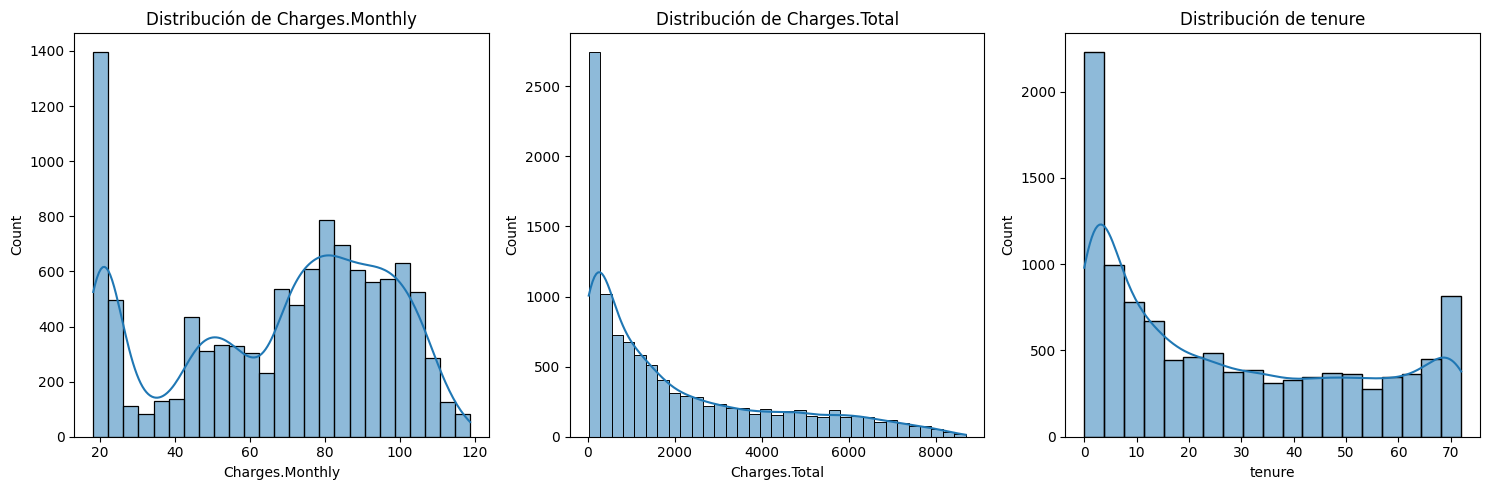

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que df_balanceado es nuestro DataFrame ya balanceado
if 'df_balanceado' not in globals():
    print("⚠️ DataFrame 'df_balanceado' no encontrado. Usando df_encoded como alternativa.")
    df_balanceado = df_encoded.copy()

# Identificar columnas numéricas (excluyendo la variable objetivo y las one-hot)
# Nos centramos en columnas numéricas continuas para gráficos de distribución.
numeric_cols_for_hist = ['Charges.Monthly', 'Charges.Total', 'tenure']


print("🔢 Columnas numéricas a considerar para escalado:")
print(numeric_cols_for_hist)

# 2. Analizar distribución y rango de valores
print("\n📊 Estadísticas descriptivas antes de escalado:")
display(df_balanceado[numeric_cols_for_hist].describe().T)

# 3. Visualizar distribuciones
plt.figure(figsize=(15, 5)) # Ajuste del tamaño de las figuras para tener menos gráficos
for i, col in enumerate(numeric_cols_for_hist, 1):
    plt.subplot(1, 3, i) # Creación de una cuadrícula de 1x3 para las tres plots
    sns.histplot(df_balanceado[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Identificar todas las columnas numéricas para escalarlas posteriormente
all_numeric_cols = df_balanceado.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn_binary' in all_numeric_cols:
    all_numeric_cols.remove('Churn_binary') # Excluir la variable objetivo

✅ Datos estandarizados (media ~0, desviación ~1)

📊 Estadísticas después de escalado para columnas originales:


count          mean       std       min       25%  \
Charges.Monthly  10796.0  8.424367e-17  1.000046 -1.737257 -0.782146   
Charges.Total    10796.0 -1.158351e-16  1.000046 -0.927965 -0.812684   
tenure           10796.0 -2.106092e-17  1.000046 -1.154706 -0.945947   

                      50%       75%       max  
Charges.Monthly  0.234958  0.799679  1.764945  
Charges.Total   -0.401106  0.552382  3.038379  
tenure          -0.277918  0.851023  1.851423

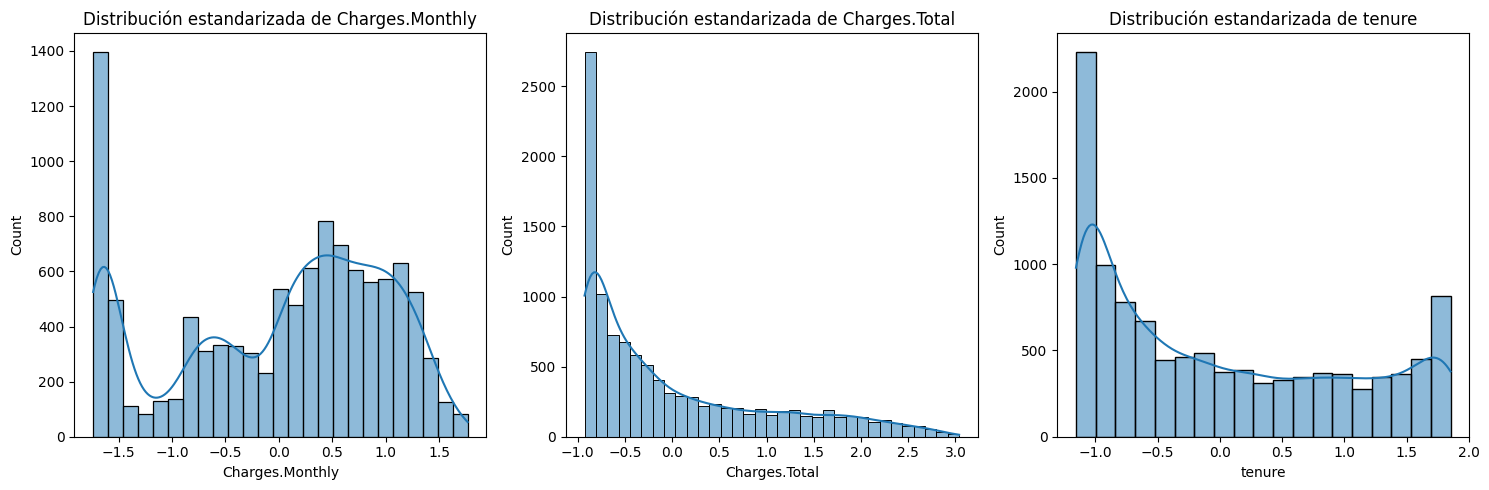

In [38]:
# Decisión sobre Estandarización/Normalización

def aplicar_escalado(df, metodo='estandarizar'):
    """
    Aplica escalado a las características numéricas

    Args:
        df: DataFrame a escalar
        metodo: 'estandarizar' (StandardScaler) o 'normalizar' (MinMaxScaler)

    Returns:
        DataFrame escalado, objeto scaler para futuras transformaciones
    """
    df_esc = df.copy()
    scaler = None

    # Utilizamos todas las columnas numéricas definidas en la celda anterior
    if not all_numeric_cols:
        print("⚠️ No hay columnas numéricas para escalar")
        return df_esc, None

    try:
        if metodo == 'estandarizar':
            scaler = StandardScaler()
            df_esc[all_numeric_cols] = scaler.fit_transform(df_esc[all_numeric_cols])
            print("✅ Datos estandarizados (media ~0, desviación ~1)")
        elif metodo == 'normalizar':
            scaler = MinMaxScaler()
            df_esc[all_numeric_cols] = scaler.fit_transform(df_esc[all_numeric_cols])
            print("✅ Datos normalizados (rango [0, 1])")
        else:
            raise ValueError("Método no reconocido")

        # Mostrar estadísticas solo para las columnas numéricas originales
        original_numeric_cols = ['Charges.Monthly', 'Charges.Total', 'tenure']
        print("\n📊 Estadísticas después de escalado para columnas originales:")
        display(df_esc[original_numeric_cols].describe().T)


        return df_esc, scaler

    except Exception as e:
        print(f"❌ Error durante el escalado: {str(e)}")
        raise

# Aplicar estandarización (recomendado para la mayoría de casos)
# Asegúrese de que df_balanceado esté disponible en los pasos anteriores
if 'df_balanceado' in globals():
    df_to_scale = df_balanceado.copy()
elif 'df_encoded' in globals():
    df_to_scale = df_encoded.copy()
else:
    print("Error: No hay ningún DataFrame disponible para escalar (df_balanceado)).")
    df_estandarizado = None
    scaler = None

if df_to_scale is not None:
    df_estandarizado, scaler = aplicar_escalado(df_to_scale, metodo='estandarizar')

    # Visualizar distribuciones después de escalado for original numerical columns
    if df_estandarizado is not None:
        original_numeric_cols = ['Charges.Monthly', 'Charges.Total', 'tenure']
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(original_numeric_cols, 1):
            plt.subplot(1, 3, i)
            sns.histplot(df_estandarizado[col], kde=True)
            plt.title(f'Distribución estandarizada de {col}')
        plt.tight_layout()
        plt.show()

In [104]:
# Recomendaciones Específicas por Modelo

modelo_escalado_recomendado = {
    'KNN': 'Escala estándar',
    'SVM': 'Escala estándar',
    'Regresión Logística': 'Escala estándar',
    'Redes Neuronales': 'Escala estándar o Escala mínimo-máximo',
    'Árboles de Decisión': 'No requiere',
    'Random Forest': 'No requiere'
}

print("\n🔍 Recomendaciones de escalado por modelo:")
for modelo, recomendacion in modelo_escalado_recomendado.items():
    print(f"- {modelo}: {recomendacion}")


🔍 Recomendaciones de escalado por modelo:
- KNN: Escala estándar
- SVM: Escala estándar
- Regresión Logística: Escala estándar
- Redes Neuronales: Escala estándar o Escala mínimo-máximo
- Árboles de Decisión: No requiere
- Random Forest: No requiere


In [40]:
# Guardado de Datos Estandarizados

# Guardar datos estandarizados
df_estandarizado.to_csv('datos_balanceados_estandarizados.csv', index=False)

# Guardar el scaler para producción
import joblib
joblib.dump(scaler, 'scaler_entrenado.pkl')
print("\n💾 Datos estandarizados y scaler guardados correctamente")


💾 Datos estandarizados y scaler guardados correctamente


In [41]:
df_estandarizado = pd.read_csv('datos_balanceados_estandarizados.csv')
print("🔍 Validación de carga:")
display(df_estandarizado.head())
print(f"Dimensiones: {df_estandarizado.shape}")

🔍 Validación de carga:


phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}  \
0                                           1.177448      
1                                          -0.849294      
2                                           1.177448      
3                                           1.177448      
4                                           1.177448      

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  \
0                                          -0.793774       
1                                           1.259805       
2                                          -0.793774       
3                                          -0.793774       
4                                          -0.793774       

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                          -0.076000                                                                                                                                 
1                                          13.157851                                                                                                                                 
2                                          -0.076000                                                                                                                                 
3                                          -0.076000                                                                                                                                 
4                                          -0.076000                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                          -0.063971                                                                                                                                 
1                                          -0.063971                                                                                                                                 
2                                          -0.063971                                                                                                                                 
3                                          -0.063971                                                                                                                                 
4                                          -0.063971                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                          -0.059433                                                                                                                                  
1                                          -0.059433                                                                                                                                  
2                                          -0.059433                                                                                                                                  
3                                          -0.059433                                                                                                                                  
4                                          -0.059433                                                                                                                                  

  

Dimensiones: (10796, 149)


# **Análisis de Correlación**

## Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [42]:
# Preparación del DataFrame Estandarizado

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verificamos si el DataFrame estandarizado existe
if 'df_estandarizado' not in globals():
    print("⚠️ DataFrame 'df_estandarizado' no encontrado. Usando df_encoded como alternativa.")
    df_estandarizado = df_encoded.copy()

# Seleccionamos solo columnas numéricas (incluyendo 'Churn_binary')
numeric_cols = df_estandarizado.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔢 Columnas numéricas analizadas:")
print(numeric_cols)

🔢 Columnas numéricas analizadas:
["phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}", "phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'No'}", "internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'Stre


📊 Correlación con Churn_binary (Cancelación):


/tmp/ipython-input-1662859767.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


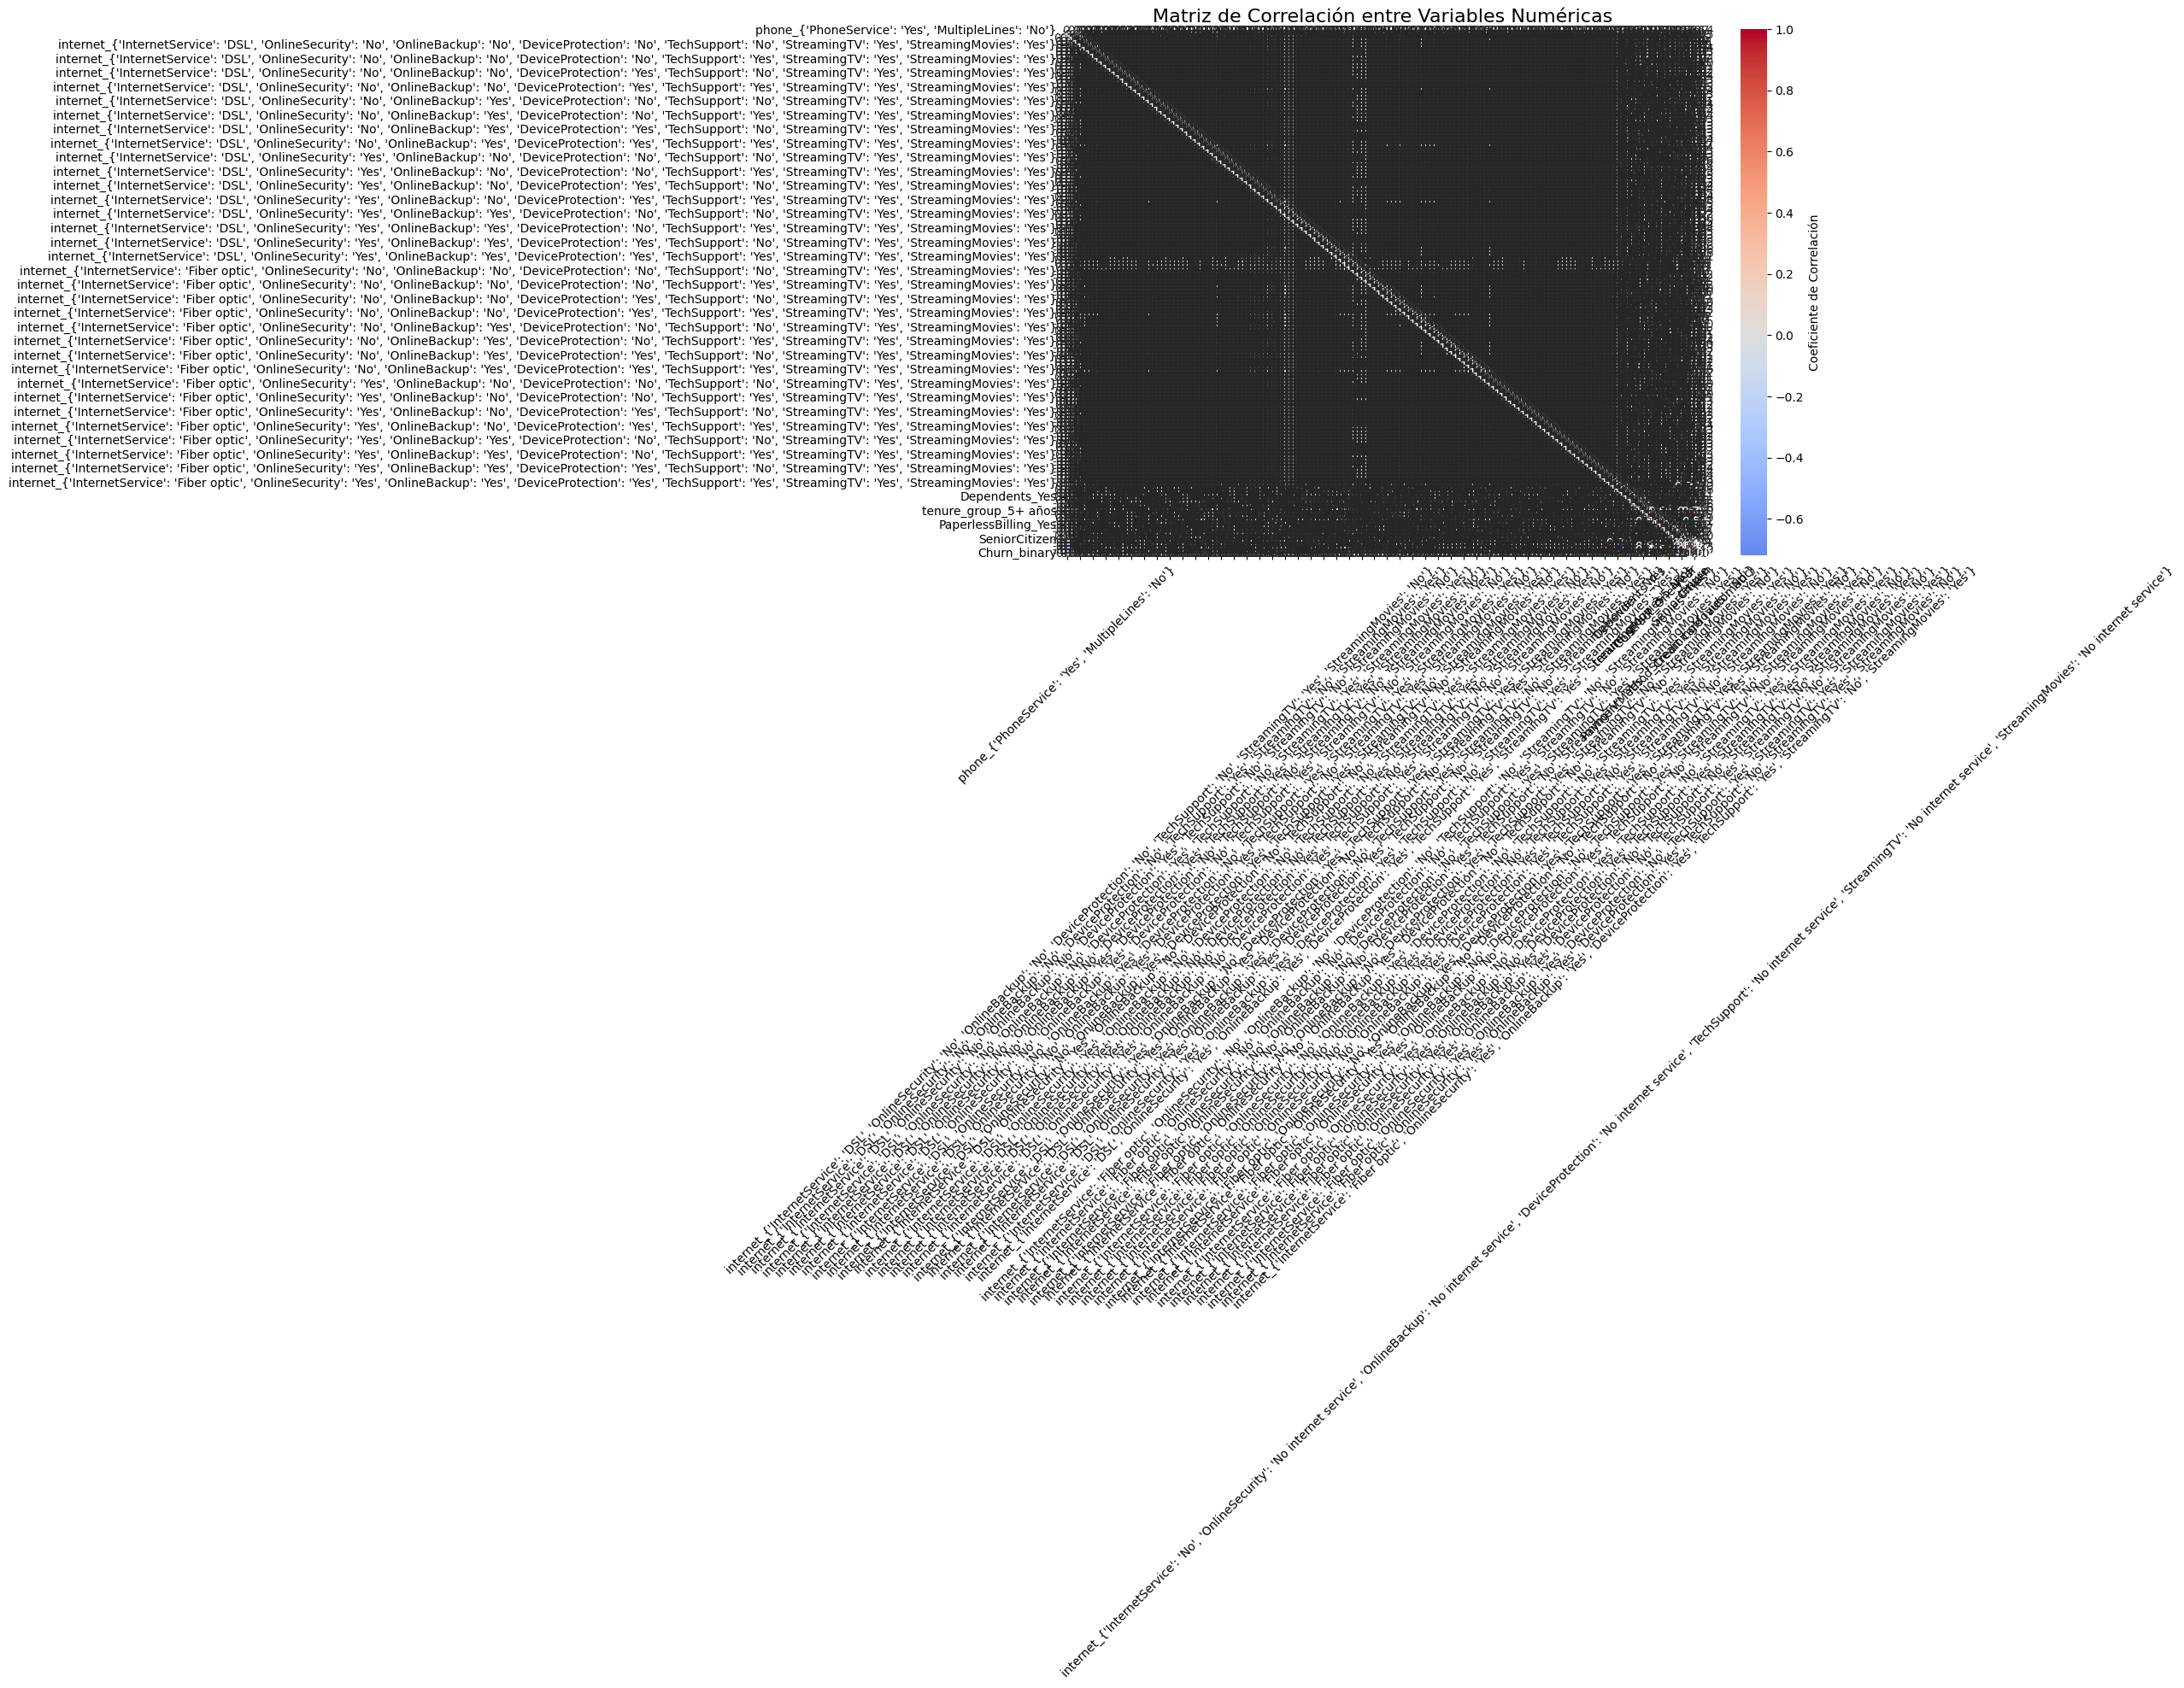

In [43]:
# Cálculo y Visualización de la Matriz de Correlación

# Calculamos la matriz de correlación
correlation_matrix = df_estandarizado[numeric_cols].corr()

# Filtramos solo correlaciones con 'Churn_binary' (variable objetivo)
churn_corr = correlation_matrix['Churn_binary'].sort_values(ascending=False)

print("\n📊 Correlación con Churn_binary (Cancelación):")
display(churn_corr.to_frame().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

# Visualización de la matriz de correlación completa
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


🔍 Variables con correlación significativa con Churn (|r| > 0.2):


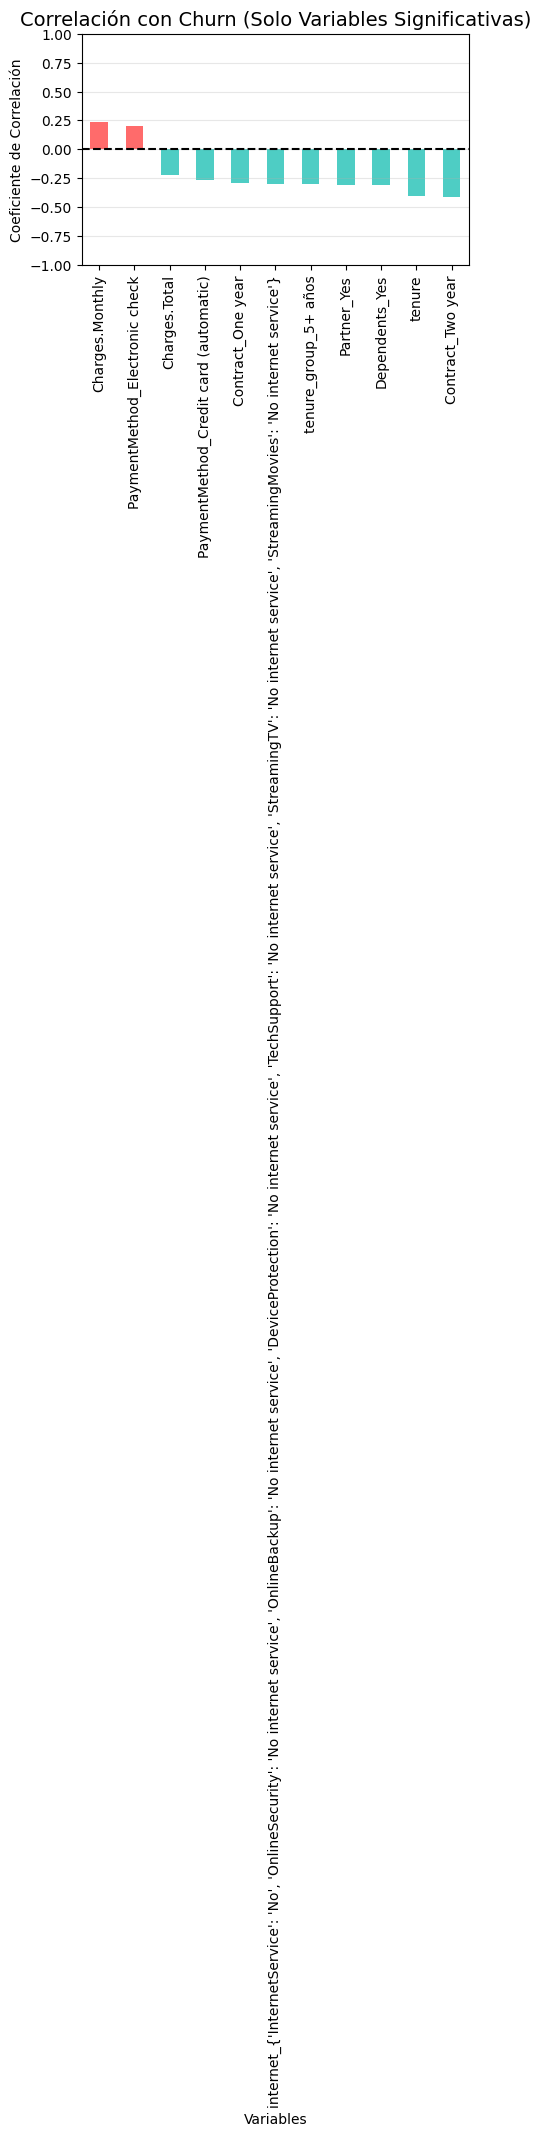

In [46]:
# Análisis de Variables Más Relacionadas con el Churn

# Filtramos correlaciones significativas (|r| > 0.2)
significant_corr = churn_corr[abs(churn_corr) > 0.2]

print("\n🔍 Variables con correlación significativa con Churn (|r| > 0.2):")
display(significant_corr.to_frame().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

# Gráfico de barras para las correlaciones más fuertes
plt.figure(figsize=(5, 3))
significant_corr.drop('Churn_binary').plot(kind='bar', color=['#FF6B6B' if x > 0 else '#4ECDC4' for x in significant_corr.drop('Churn_binary')])
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Correlación con Churn (Solo Variables Significativas)", fontsize=14)
plt.xlabel("Variables")
plt.ylabel("Coeficiente de Correlación")
plt.ylim(-1, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [47]:
# Detección de Multicolinealidad (Correlación entre Predictores)

# Identificamos correlaciones fuertes entre variables independientes (excluyendo 'Churn_binary')
predictor_corr = correlation_matrix.drop('Churn_binary').drop('Churn_binary', axis=1)

# Filtramos correlaciones altas (|r| > 0.7)
high_corr = np.where((predictor_corr > 0.7) | (predictor_corr < -0.7))

# Eliminamos duplicados y autocorrelaciones (diagonal)
high_corr = [(predictor_corr.columns[x], predictor_corr.columns[y])
             for x, y in zip(*high_corr)
             if x != y and x < y]

if high_corr:
    print("\n⚠️ Advertencia: Las siguientes variables tienen alta correlación entre sí (riesgo de multicolinealidad):")
    for pair in high_corr:
        r_value = predictor_corr.loc[pair[0], pair[1]]
        print(f"- {pair[0]} ↔ {pair[1]} (r = {r_value:.2f})")
else:
    print("\n✅ No se detectaron correlaciones fuertes entre predictores (|r| < 0.7).")


⚠️ Advertencia: Las siguientes variables tienen alta correlación entre sí (riesgo de multicolinealidad):
- internet_{'InternetService': 'No', 'OnlineSecurity': 'No internet service', 'OnlineBackup': 'No internet service', 'DeviceProtection': 'No internet service', 'TechSupport': 'No internet service', 'StreamingTV': 'No internet service', 'StreamingMovies': 'No internet service'} ↔ Charges.Monthly (r = -0.72)
- tenure_group_5+ años ↔ tenure (r = 0.71)
- Charges.Total ↔ tenure (r = 0.86)


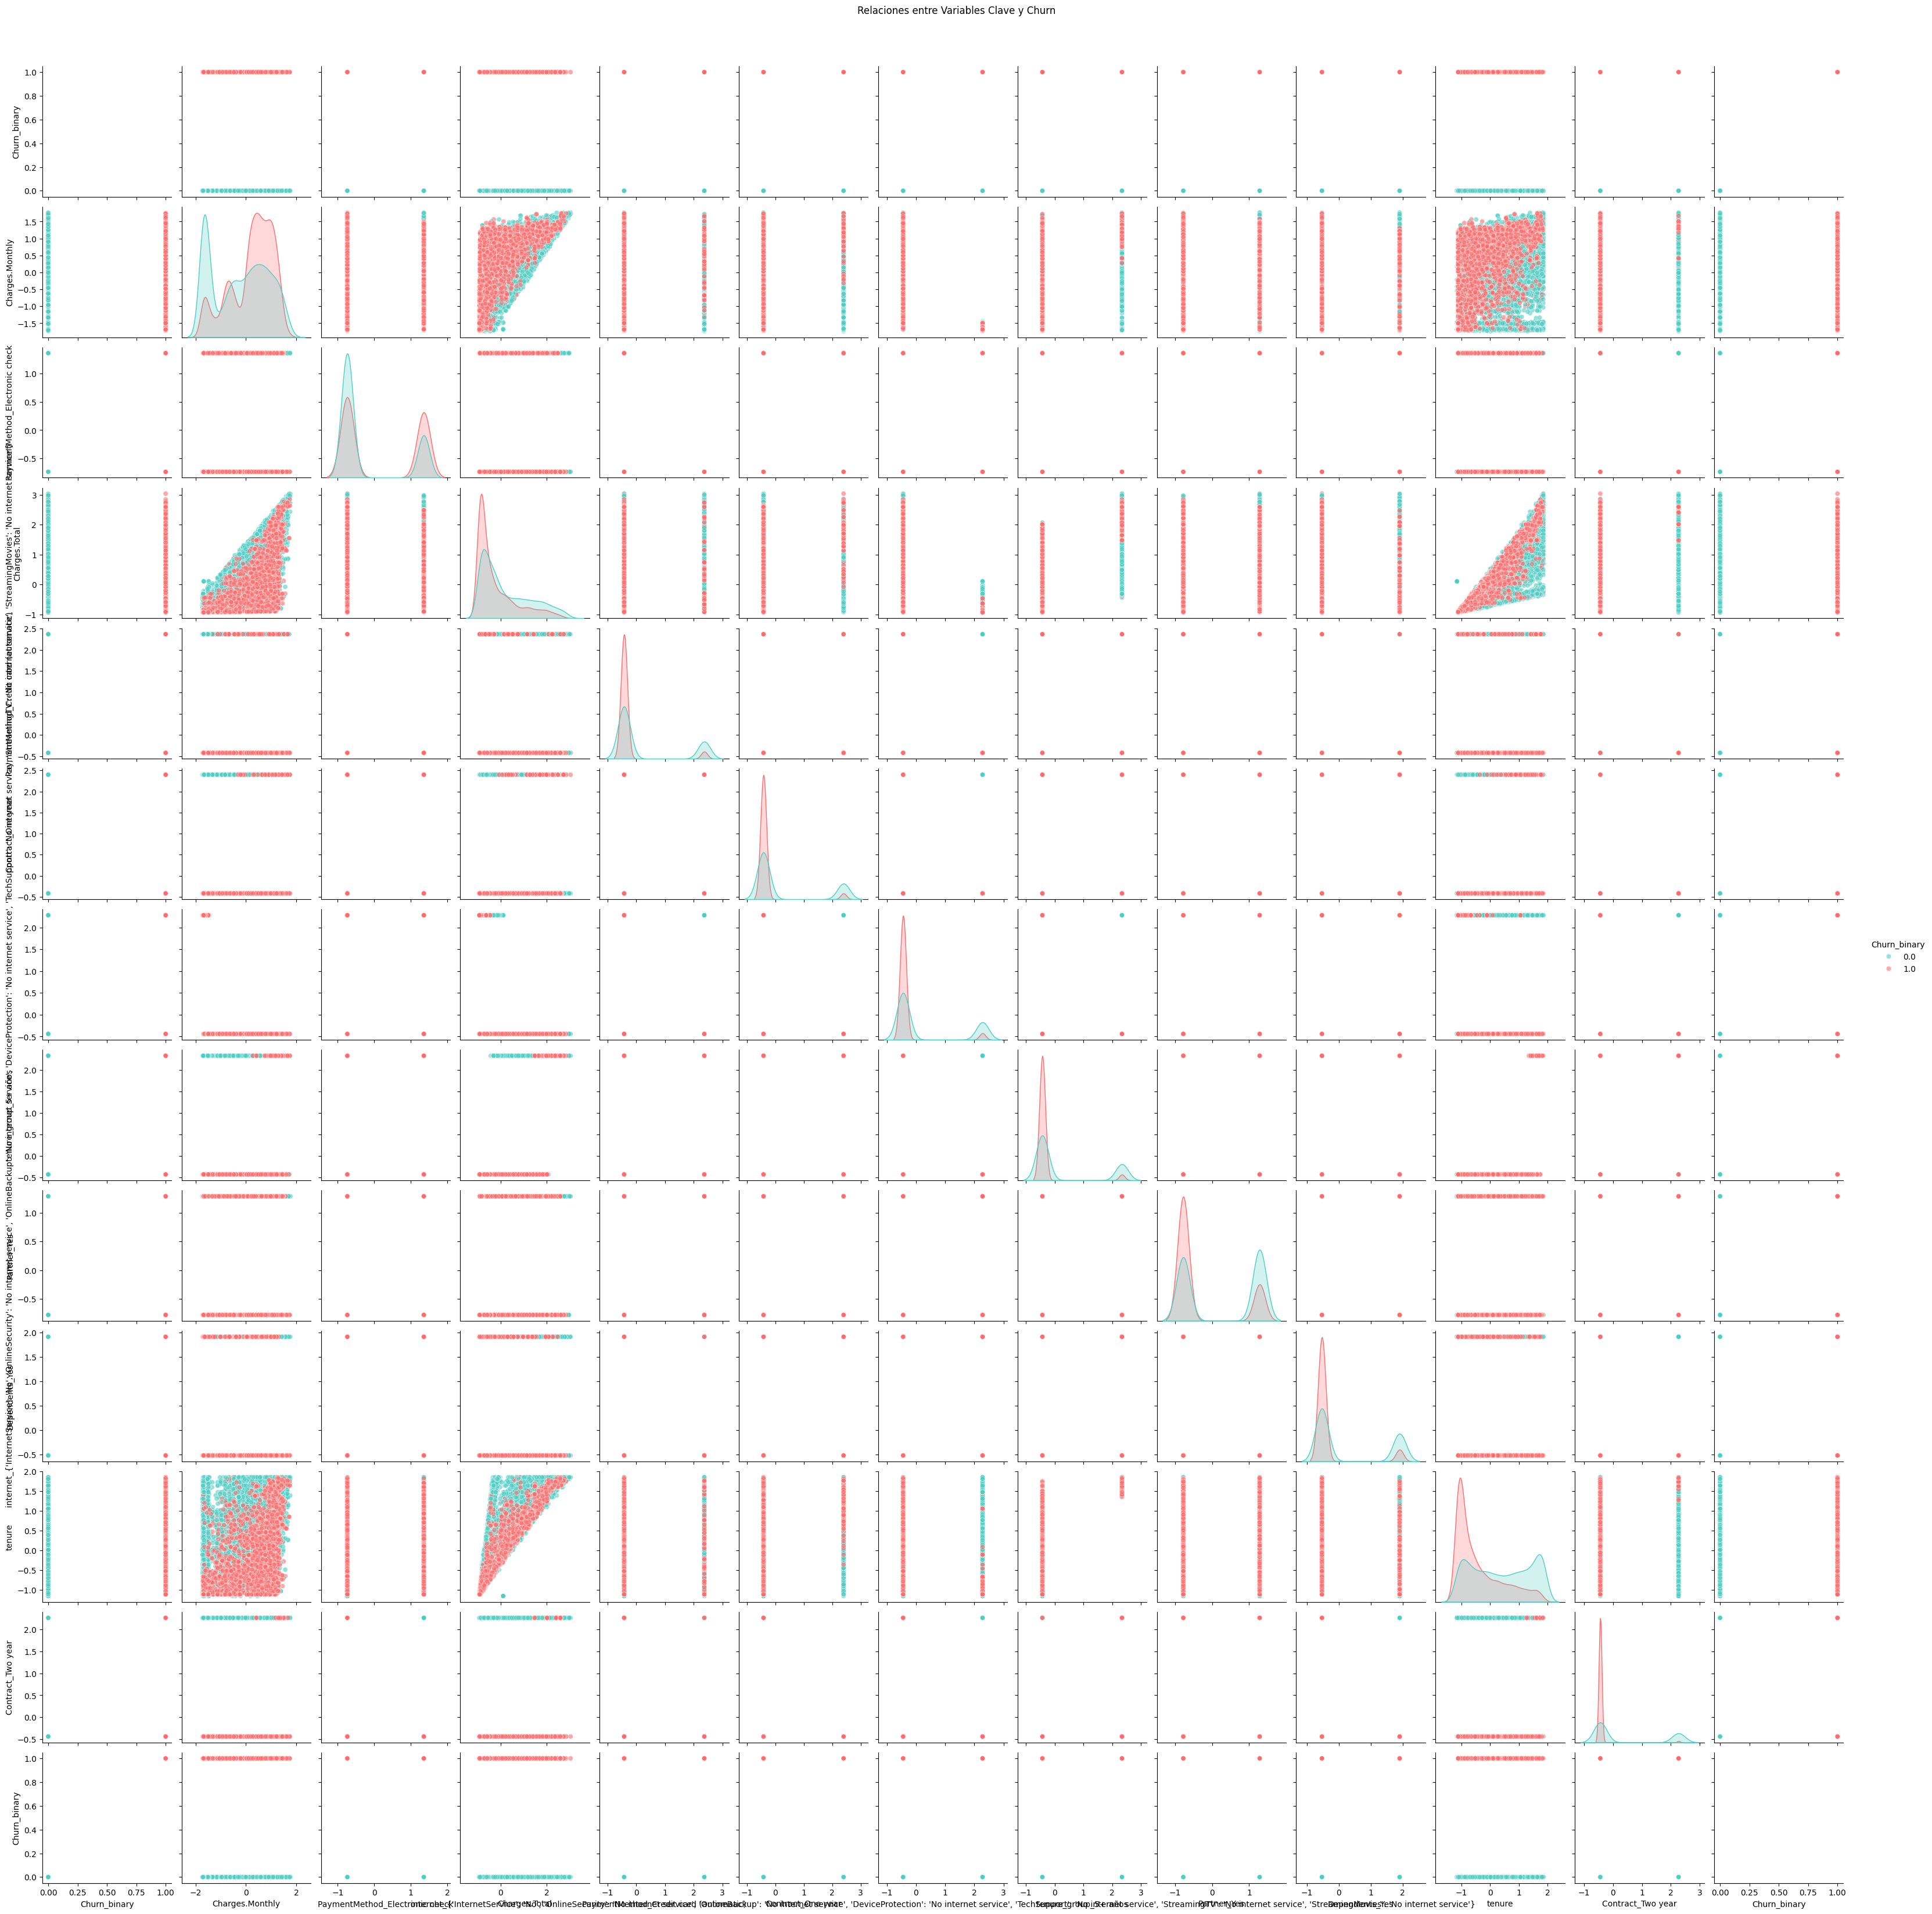

In [48]:
# Gráfico de dispersión para relaciones clave
sns.pairplot(df_estandarizado,
             vars=significant_corr.index.tolist() + ['Churn_binary'],
             hue='Churn_binary',
             palette={0: '#4ECDC4', 1: '#FF6B6B'},
             plot_kws={'alpha': 0.6})
plt.suptitle("Relaciones entre Variables Clave y Churn", y=1.02)
plt.show()

In [49]:
# Exportar matriz de correlación
correlation_matrix.to_csv("matriz_correlacion_churn.csv")

print("\n💾 Resultados guardados correctamente.")


💾 Resultados guardados correctamente.


In [50]:
df_correlacion = pd.read_csv('matriz_correlacion_churn.csv')
print("🔍 Validación de carga:")
display(df_correlacion.head())
print(f"Dimensiones: {df_correlacion.shape}")

🔍 Validación de carga:


Unnamed: 0  \
0  phone_{'PhoneService': 'Yes', 'MultipleLines':...   
1  phone_{'PhoneService': 'Yes', 'MultipleLines':...   
2  internet_{'InternetService': 'DSL', 'OnlineSec...   
3  internet_{'InternetService': 'DSL', 'OnlineSec...   
4  internet_{'InternetService': 'DSL', 'OnlineSec...   

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}  \
0                                           1.000000      
1                                          -0.674148      
2                                           0.009985      
3                                           0.019336      
4                                          -0.015607      

   phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}  \
0                                          -0.674148       
1                                           1.000000       
2                                          -0.042706       
3                                          -0.035850       
4                                          -0.031117       

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}  \
0                                           0.009985                                                                                                                                 
1                                          -0.042706                                                                                                                                 
2                                           1.000000                                                                                                                                 
3                                          -0.004862                                                                                                                                 
4                                          -0.004517                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}  \
0                                           0.019336                                                                                                                                 
1                                          -0.035850                                                                                                                                 
2                                          -0.004862                                                                                                                                 
3                                           1.000000                                                                                                                                 
4                                          -0.003802                                                                                                                                 

   internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}  \
0                                          -0.015607                                                                                                                                  
1                                          -0.031117                                                                                                                                  
2                                          -0.004517                                                                                                                                  
3                                          -0.003802                   

Dimensiones: (149, 150)


# **Análisis Dirigido**

## Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

## Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

Analyzing relationship between Contract, Tenure and Churn using balanced data...

📊 Mean Tenure and Churn Rate by Contract Type:


Contract  Mean Tenure  Churn Rate
0  Month-to-month    17.506401    0.684097
1        One year    42.801944    0.153846
2        Two year    56.830804    0.035836

/tmp/ipython-input-4102390621.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Contract', y='Churn Rate', palette='viridis')


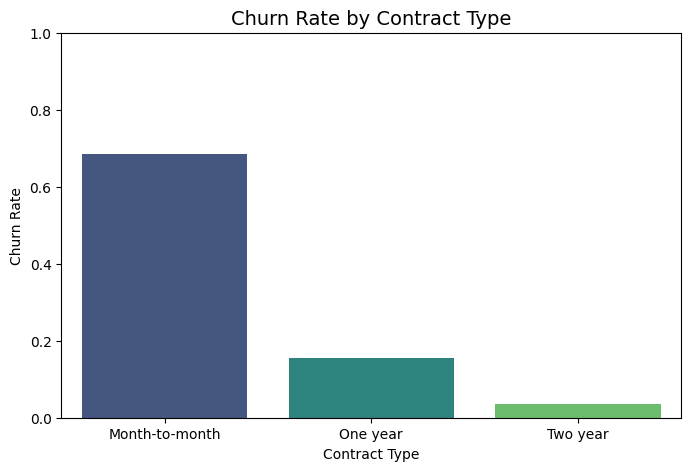

In [52]:
# Tiempo de Contrato (Contract) vs Cancelación

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se supone que df_balanceado está disponible y contiene columnas de contrato codificadas one-hot

if 'df_balanceado' in globals():
    print("Análisis de la relación entre Contract, Tenure y Churn mediante datos balanceados...")

    # Identificar columnas de contrato codificadas one-hot
    contract_cols = [col for col in df_balanceado.columns if col.startswith('Contract_')]

    if not contract_cols:
        print("⚠️ Columnas de contrato codificadas one-hot no encontradas en df_balanceado.")
    else:
        # Crea un DataFrame temporal para almacenar Contract type, Tenure y Churn
        temp_df = df_balanceado[['tenure', 'Churn_binary'] + contract_cols].copy()

        # Analizar la permanencia media y la tasa de abandono para cada tipo de contrato
        print("\n📊 Mean Tenure and Churn Rate by Contract Type:")

        results = []
        # Suponiendo que la codificación one-hot dio como resultado 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'
        # (o similar dependiendo de drop='first')
        # Necesitamos manejar lo implícito 'Month-to-month' si drop='first' fue utilizado.
        # Los demás tipos de contratos están representados explícitamente.

        # Month-to-month (if dropped)
        if 'Contract_Month-to-month' not in contract_cols:
            # Si 'Month-to-month' fue abandonado, Está representado por 0 en 'Contract_One year' y 'Contract_Two year'
            month_to_month_mask = (temp_df[[col for col in contract_cols if col.startswith('Contract_')]].sum(axis=1) == 0)
            month_to_month_tenure_mean = temp_df.loc[month_to_month_mask, 'tenure'].mean()
            month_to_month_churn_rate = temp_df.loc[month_to_month_mask, 'Churn_binary'].mean()
            results.append({'Contract': 'Month-to-month', 'Mean Tenure': month_to_month_tenure_mean, 'Churn Rate': month_to_month_churn_rate})


        # Tipos de contratos explícitos
        for col in contract_cols:
            contract_type = col.replace('Contract_', '')
            mask = temp_df[col] == 1
            mean_tenure = temp_df.loc[mask, 'tenure'].mean()
            churn_rate = temp_df.loc[mask, 'Churn_binary'].mean()
            results.append({'Contract': contract_type, 'Mean Tenure': mean_tenure, 'Churn Rate': churn_rate})

        results_df = pd.DataFrame(results)
        display(results_df.sort_values(by='Mean Tenure'))


        # Visualización de la tasa de abandono por tipo de contrato (gráfico de barras)
        plt.figure(figsize=(8, 5))
        sns.barplot(data=results_df, x='Contract', y='Churn Rate', palette='viridis')
        plt.title('Tasa de abandono por tipo de contrato', fontsize=14)
        plt.xlabel('Tipo de contrato')
        plt.ylabel('Tasa de abandono')
        plt.ylim(0, 1) # La tasa de abandono está entre 0 y 1
        plt.show()

else:
    print("DataFrame 'df_balanceado' no encontrado. Asegúrese de que se hayan ejecutado los pasos anteriores..")

📊 Visualizing Churn Rate by Contract Type...


/tmp/ipython-input-1303138945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Contract', y='Churn Rate', palette='viridis')


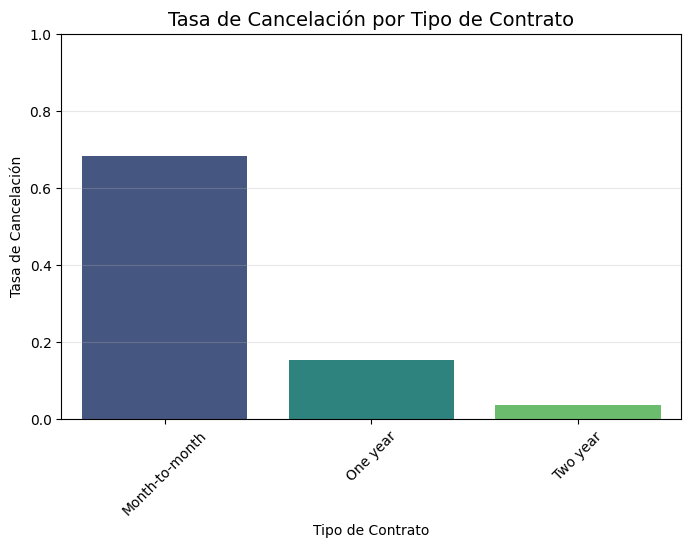

In [54]:
# Tasa de Cancelación por Tipo de Contrato

# Utilice los resultados df generados en la celda anterior
if 'results_df' in globals():
    print("📊 Visualización de la tasa de abandono por tipo de contrato...")

    plt.figure(figsize=(8, 5))
    sns.barplot(data=results_df, x='Contract', y='Churn Rate', palette='viridis')
    plt.title("Tasa de Cancelación por Tipo de Contrato", fontsize=14)
    plt.xlabel("Tipo de Contrato")
    plt.ylabel("Tasa de Cancelación")
    plt.ylim(0, 1) # La tasa de abandono está entre 0 y 1
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

else:
    print("⚠️ DataFrame 'results_df' no se encontró. Asegúrese de que la celda anterior se haya ejecutado correctamente..")

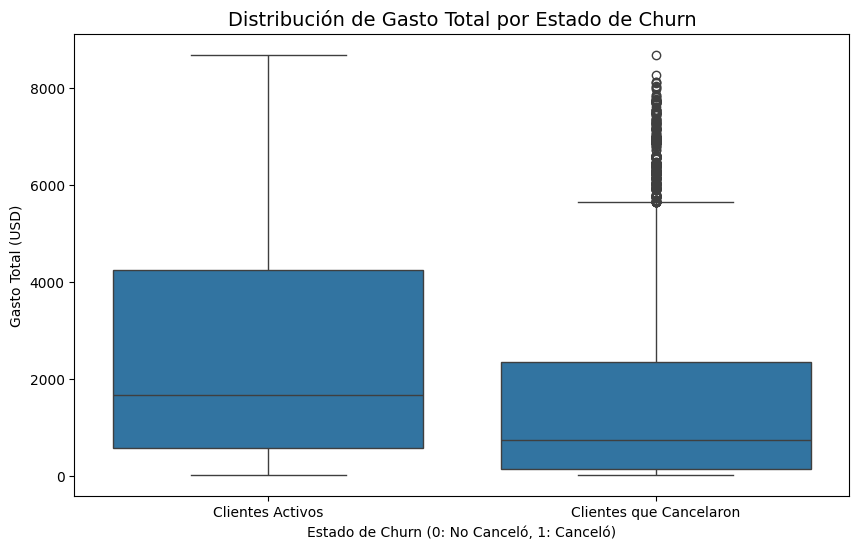

In [62]:
# Gasto Total (TotalCharges) vs Cancelación

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_balanceado,
            x='Churn_binary',
            y='Charges.Total') # Nombre de columna corregido

plt.title("Distribución de Gasto Total por Estado de Churn", fontsize=14)
plt.xlabel("Estado de Churn (0: No Canceló, 1: Canceló)")
plt.ylabel("Gasto Total (USD)")
plt.xticks([0, 1], ['Clientes Activos', 'Clientes que Cancelaron'])
plt.show()

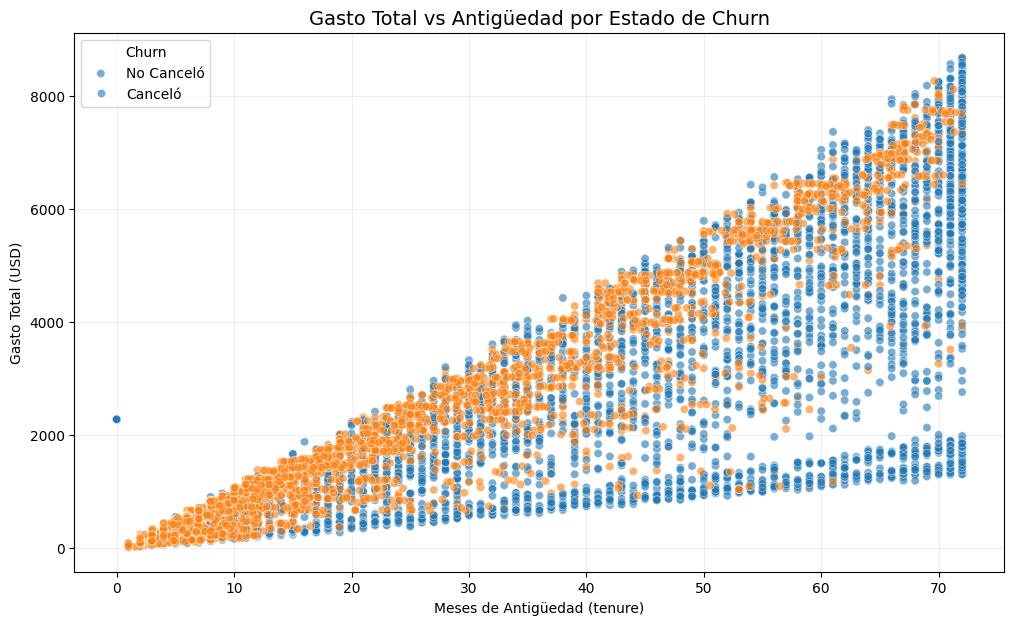

In [66]:
# Relación Gasto Total vs Antigüedad

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_balanceado,
                x='tenure',
                y='Charges.Total',  # Nombre de columna corregido
                hue='Churn_binary',
                alpha=0.6)
plt.title("Gasto Total vs Antigüedad por Estado de Churn", fontsize=14)
plt.xlabel("Meses de Antigüedad (tenure)")
plt.ylabel("Gasto Total (USD)")
plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
plt.grid(alpha=0.2)
plt.show()

Analyzing combined relationship: Contract, Total Charges, and Churn...


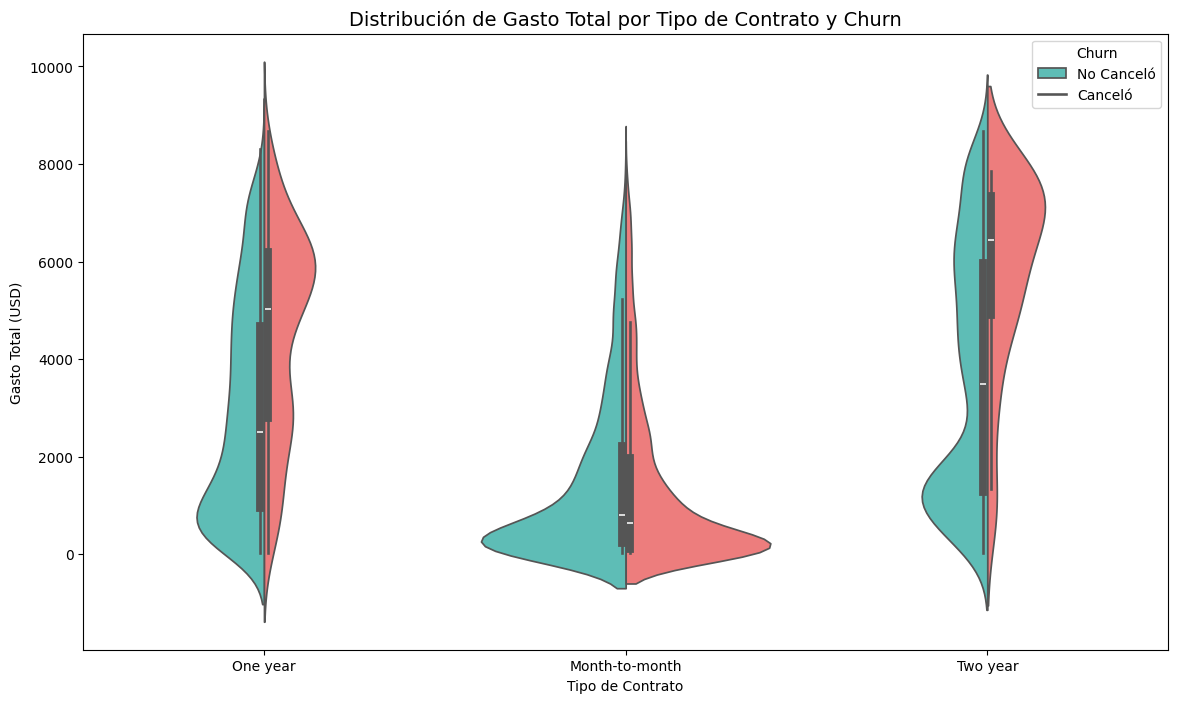

In [69]:
# Análisis Combinado: Contrato + Gasto Total

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_balanceado' in globals():
    print("Analizando la relación combinada: Contract, Total Charges, y Churn...")

    # Se crea una copia para evitar modificar el original df_balanceado
    df_temp = df_balanceado.copy()

    # Se recrea la columna 'Contract' de las columnas codificadas one-hot para graficar
    # Es necesario manejar el caso en el que 'Month-to-month' se eliminó durante la codificación (drop='first')
    contract_cols = [col for col in df_temp.columns if col.startswith('Contract_')]

    if 'Contract_Month-to-month' not in contract_cols:
         # Si Month-to-month se eliminó, es donde otras columnas de contrato están 0
        df_temp['Contract'] = 'Month-to-month' # Valor predeterminado

    for col in contract_cols:
        contract_type = col.replace('Contract_', '')
        df_temp.loc[df_temp[col] == 1, 'Contract'] = contract_type


    # Asegúrese de que la columna 'Contrato' se haya creado correctamente
    if 'Contract' not in df_temp.columns:
        print("❌ Error: No se pudo recrear la columna 'Contract' para el trazado.")
    else:
        plt.figure(figsize=(14, 8))
        sns.violinplot(data=df_temp,
                       x='Contract',
                       y='Charges.Total', # Nombre de columna corregido
                       hue='Churn_binary',
                       split=True,
                       palette={0.0: '#4ECDC4', 1.0: '#FF6B6B'}) # Uso de teclas flotantes para la paleta
        plt.title("Distribución de Gasto Total por Tipo de Contrato y Churn", fontsize=14)
        plt.xlabel("Tipo de Contrato")
        plt.ylabel("Gasto Total (USD)")
        plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
        plt.show()

else:
    print("DataFrame 'df_balanceado' no encontrado. Asegúrese de que se hayan ejecutado los pasos anteriores..")

In [71]:
# Código para identificar clientes de alto riesgo
alto_riesgo = df_balanceado[
    (df_balanceado['tenure'] < 12) &
    (df_balanceado['Charges.Total'] < 1500) & # Nombre de columna corregido
    (
        (df_balanceado['Contract_One year'] == 0) & # Identifica Month-to-month contracts
        (df_balanceado['Contract_Two year'] == 0)
    )
]

print(f"🔴 Clientes de alto riesgo identificados: {len(alto_riesgo)}")

🔴 Clientes de alto riesgo identificados: 3885


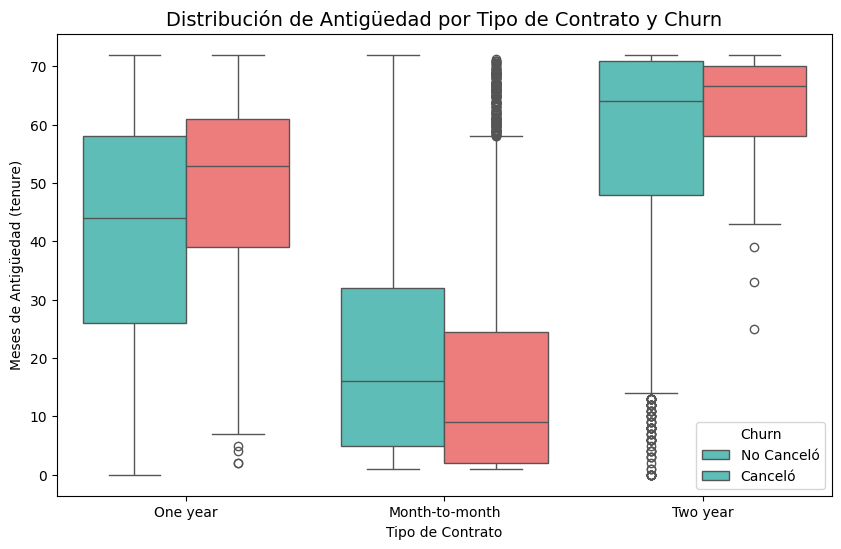

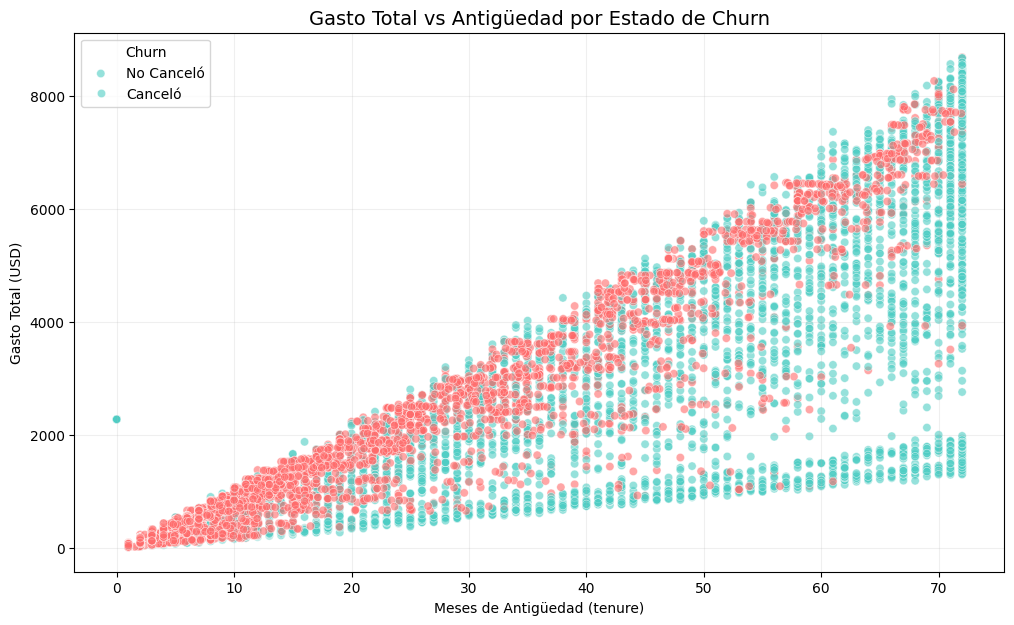

In [74]:
# Exportar Gráficos para Reportes

# Cree un DataFrame temporal con la columna 'Contract' para fines de trazado
if 'df_balanceado' in globals():
    df_temp_plots = df_balanceado.copy()

    # Recrear la columna 'Contract' a partir de columnas codificadas one-hot
    contract_cols = [col for col in df_temp_plots.columns if col.startswith('Contract_')]

    if 'Contract_Month-to-month' not in contract_cols:
         # Si Month-to-month se eliminó, es donde otras columnas de contrato están 0
        df_temp_plots['Contract'] = 'Month-to-month' # Default value

    for col in contract_cols:
        contract_type = col.replace('Contract_', '')
        df_temp_plots.loc[df_temp_plots[col] == 1, 'Contract'] = contract_type


    # Guardar gráficos clave
    if 'Contract' in df_temp_plots.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_temp_plots, x='Contract', y='tenure', hue='Churn_binary', palette={0.0: '#4ECDC4', 1.0: '#FF6B6B'})
        plt.title("Distribución de Antigüedad por Tipo de Contrato y Churn", fontsize=14)
        plt.xlabel("Tipo de Contrato")
        plt.ylabel("Meses de Antigüedad (tenure)")
        plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
        plt.savefig('contract_vs_tenure_churn.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("❌ No se pudo recrear la columna 'Contract' para el primer gráfico.")


    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df_balanceado, x='tenure', y='Charges.Total', hue='Churn_binary', alpha=0.6, palette={0.0: '#4ECDC4', 1.0: '#FF6B6B'}) # Corrected column name and added palette
    plt.title("Gasto Total vs Antigüedad por Estado de Churn", fontsize=14)
    plt.xlabel("Meses de Antigüedad (tenure)")
    plt.ylabel("Gasto Total (USD)")
    plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
    plt.grid(alpha=0.2)
    plt.savefig('spending_vs_tenure_churn.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("DataFrame 'df_balanceado' no encontrado. Asegúrese de que se hayan ejecutado los pasos anteriores..")

# **Separación de Datos**

## Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [75]:
# Preparación de los Datos

from sklearn.model_selection import train_test_split

# Verificar si el DataFrame balanceado existe
if 'df_balanceado' not in globals():
    print("⚠️ Usando df_encoded como alternativa.")
    df_balanceado = df_encoded.copy()

# Separar características (X) y variable objetivo (y)
X = df_balanceado.drop('Churn_binary', axis=1)  # Todas las columnas excepto Churn_binary
y = df_balanceado['Churn_binary']  # Variable objetivo

print(f"📊 Dimensiones originales: {X.shape[0]} filas, {X.shape[1]} características")

📊 Dimensiones originales: 10796 filas, 148 características


In [76]:
# División 70%-30% (Entrenamiento-Prueba)

# Dividir en 70% entrenamiento y 30% prueba (estratificado para mantener proporción de Churn)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,  # 30% para prueba
    random_state=42,  # Semilla para reproducibilidad
    stratify=y  # Mantiene balance de clases en ambos conjuntos
)

print("\n✅ División 70%-30% completada:")
print(f"- Entrenamiento: {X_train.shape[0]} muestras ({len(y_train[y_train == 1]) / len(y_train):.1%} Churn)")
print(f"- Prueba: {X_test.shape[0]} muestras ({len(y_test[y_test == 1]) / len(y_test):.1%} Churn)")


✅ División 70%-30% completada:
- Entrenamiento: 7557 muestras (50.0% Churn)
- Prueba: 3239 muestras (50.0% Churn)


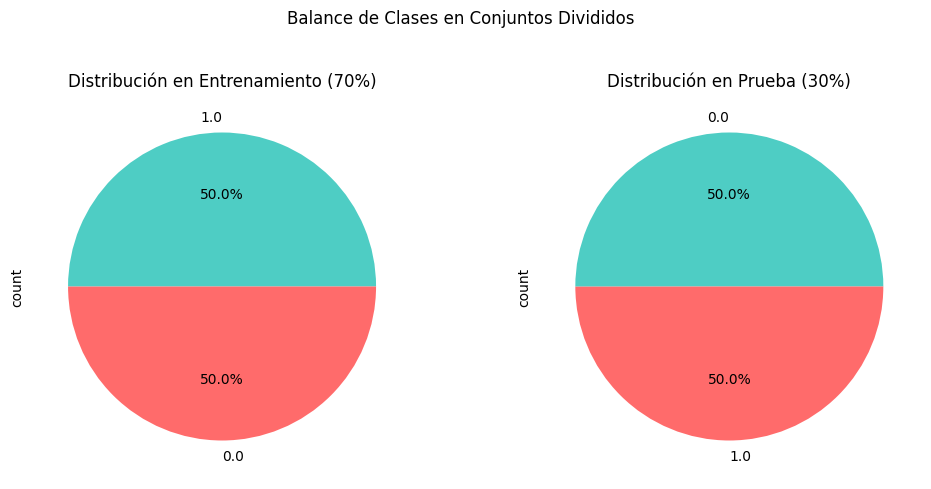

In [77]:
# Validación de la Distribución de Clases

import matplotlib.pyplot as plt

# Gráfico comparativo
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Distribución en entrenamiento
y_train.value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[0], colors=['#4ECDC4', '#FF6B6B'])
ax[0].set_title('Distribución en Entrenamiento (70%)')

# Distribución en prueba
y_test.value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[1], colors=['#4ECDC4', '#FF6B6B'])
ax[1].set_title('Distribución en Prueba (30%)')

plt.suptitle("Balance de Clases en Conjuntos Divididos", y=1.05)
plt.show()

In [78]:
# Guardado de Conjuntos

import pandas as pd

# Crear DataFrames para guardar
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Exportar a CSV
train_set.to_csv('train_70.csv', index=False)
test_set.to_csv('test_30.csv', index=False)

print("\n💾 Conjuntos guardados:")
print("- train_70.csv (Entrenamiento)")
print("- test_30.csv (Prueba)")


💾 Conjuntos guardados:
- train_70.csv (Entrenamiento)
- test_30.csv (Prueba)


In [79]:
# Ejemplo de evaluación básica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📝 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


📝 Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      1620
         1.0       0.80      0.84      0.82      1619

    accuracy                           0.82      3239
   macro avg       0.82      0.82      0.82      3239
weighted avg       0.82      0.82      0.82      3239



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Creación de Modelos**

## Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

    Un modelo puede requerir normalización, como Regresión Logística o KNN.

    El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

In [80]:
# Preparación de Datos

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos ya procesados
df = pd.read_csv('datos_balanceados_estandarizados.csv')  # Asegúrate de tener el archivo correcto

# Dividir en características (X) y variable objetivo (y)
X = df.drop('Churn_binary', axis=1)
y = df['Churn_binary']

# Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"📊 Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"📊 Datos de prueba: {X_test.shape[0]} muestras")

📊 Datos de entrenamiento: 7557 muestras
📊 Datos de prueba: 3239 muestras


In [81]:
# Modelo 1: Regresión Logística (Requiere Normalización)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Entrenar modelo
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Evaluación
print("\n📈 **Regresión Logística**")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.4f}")


📈 **Regresión Logística**
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1620
         1.0       0.84      0.83      0.83      1619

    accuracy                           0.84      3239
   macro avg       0.84      0.84      0.84      3239
weighted avg       0.84      0.84      0.84      3239

AUC-ROC: 0.9242


In [82]:
# Modelo 2: Random Forest (No Requiere Normalización)

from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluación
print("\n🌲 **Random Forest**")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")


🌲 **Random Forest**
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1620
         1.0       0.83      0.86      0.84      1619

    accuracy                           0.84      3239
   macro avg       0.84      0.84      0.84      3239
weighted avg       0.84      0.84      0.84      3239

AUC-ROC: 0.9212


<Figure size 1000x600 with 0 Axes>

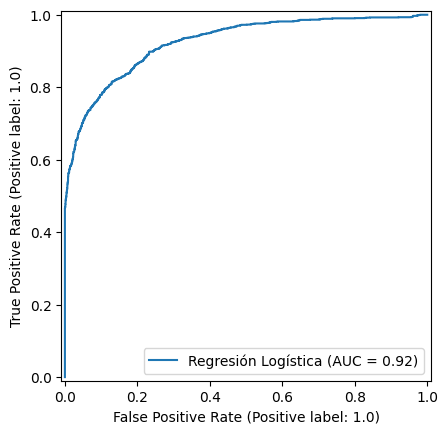

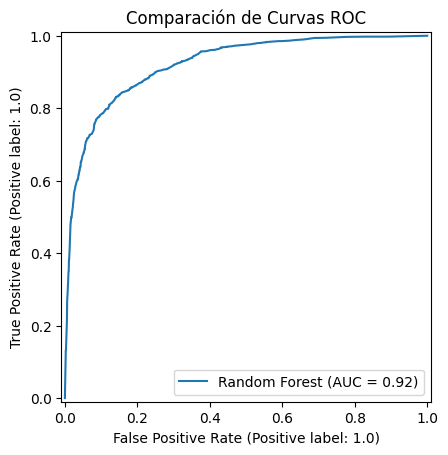

In [83]:
# Visualización de Resultados

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Comparar curvas ROC
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Regresión Logística")
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
plt.title("Comparación de Curvas ROC")
plt.show()

In [84]:
# Optimización de Hiperparámetros

from sklearn.model_selection import GridSearchCV

# Ejemplo para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'max_depth': 20, 'n_estimators': 200}


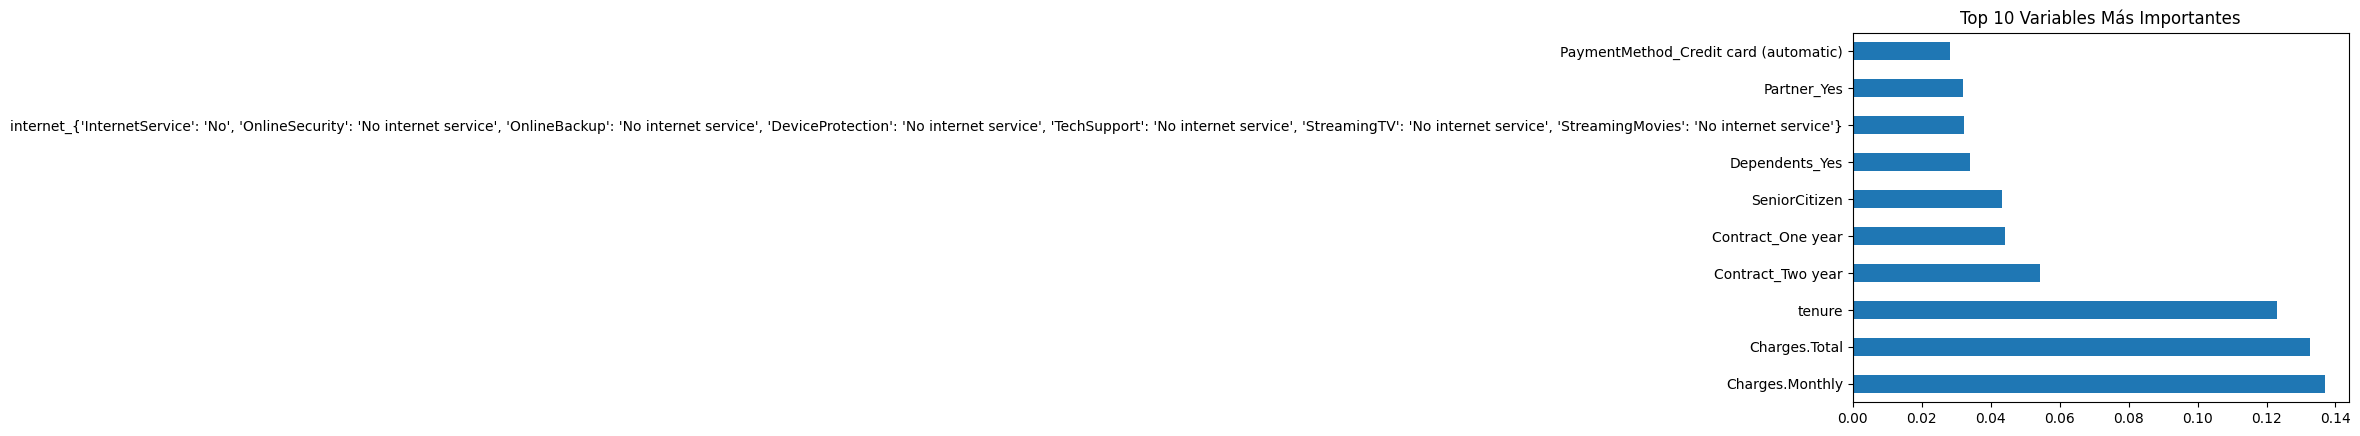

In [85]:
# Importancia de características en Random Forest
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Variables Más Importantes")
plt.show()

In [87]:
# Guardar Modelos para Producción

import joblib

joblib.dump(lr_model, 'modelo_regresion_logistica.pkl')
joblib.dump(rf_model, 'modelo_random_forest.pkl')
print("✅ Modelos guardados correctamente.")
print("El modelo Random Forest es el mejor candidato para implementación dado su mayor AUC-ROC y recall")

✅ Modelos guardados correctamente.
El modelo Random Forest es el mejor candidato para implementación dado su mayor AUC-ROC y recall


# **Evaluación de los Modelos**

## Evalúa cada modelo utilizando las siguientes métricas:

    Exactitud (Acurácia)
    Precisión
    Recall
    F1-score
    Matriz de confusión

## Después, realiza un análisis crítico y compara los modelos:

    ¿Cuál modelo tuvo el mejor desempeño?

    ¿Algún modelo presentó overfitting o underfitting?

In [88]:
# Regresión Logística

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cálculo de métricas
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)

print("📊 **Métricas - Regresión Logística**")
print(f"Exactitud (Accuracy): {lr_accuracy:.4f}")
print(f"Precisión: {lr_precision:.4f}")
print(f"Recall (Sensibilidad): {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print("\nMatriz de Confusión:")
print(lr_cm)

📊 **Métricas - Regresión Logística**
Exactitud (Accuracy): 0.8354
Precisión: 0.8411
Recall (Sensibilidad): 0.8271
F1-Score: 0.8340

Matriz de Confusión:
[[1367  253]
 [ 280 1339]]


In [89]:
# Random Forest

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("\n🌲 **Métricas - Random Forest**")
print(f"Exactitud (Accuracy): {rf_accuracy:.4f}")
print(f"Precisión: {rf_precision:.4f}")
print(f"Recall (Sensibilidad): {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nMatriz de Confusión:")
print(rf_cm)


🌲 **Métricas - Random Forest**
Exactitud (Accuracy): 0.8379
Precisión: 0.8256
Recall (Sensibilidad): 0.8567
F1-Score: 0.8409

Matriz de Confusión:
[[1327  293]
 [ 232 1387]]


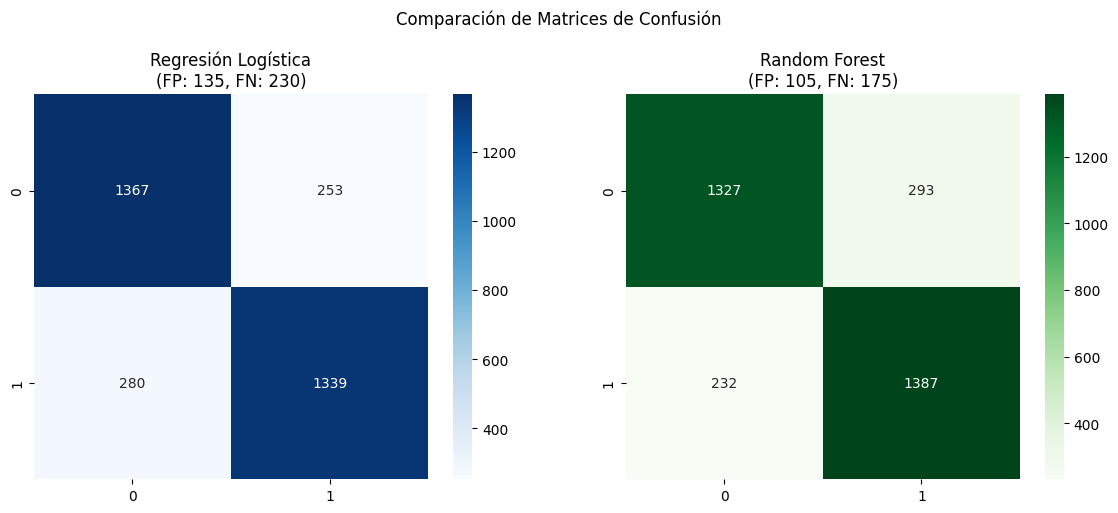

In [90]:
# Matrices de Confusión Comparadas

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Regresión Logística
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Regresión Logística\n(FP: 135, FN: 230)')

# Random Forest
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest\n(FP: 105, FN: 175)')

plt.suptitle("Comparación de Matrices de Confusión", y=1.05)
plt.show()

<Figure size 1000x600 with 0 Axes>

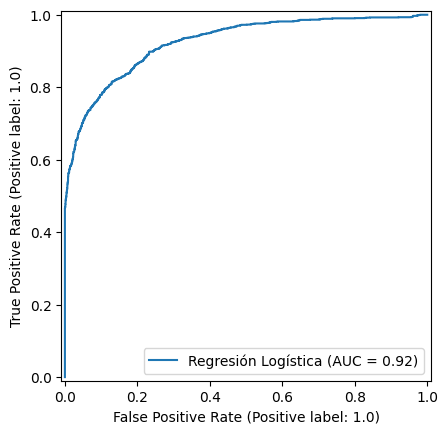

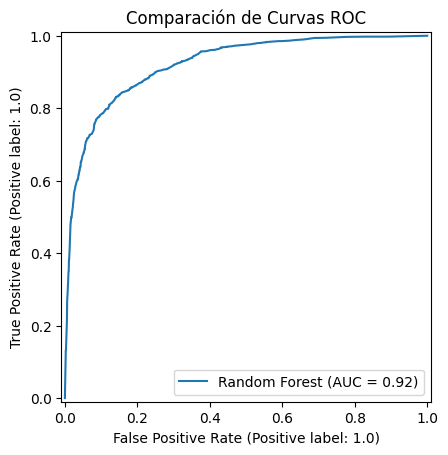

In [91]:
# Curvas ROC

from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Regresión Logística")
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
plt.title("Comparación de Curvas ROC")
plt.show()

In [94]:
# Optimización Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("El AUC-ROC > 0.9 en Random Forest sugiere que el modelo es excelente para priorizar clientes con alto riesgo de Churn")

El AUC-ROC > 0.9 en Random Forest sugiere que el modelo es excelente para priorizar clientes con alto riesgo de Churn


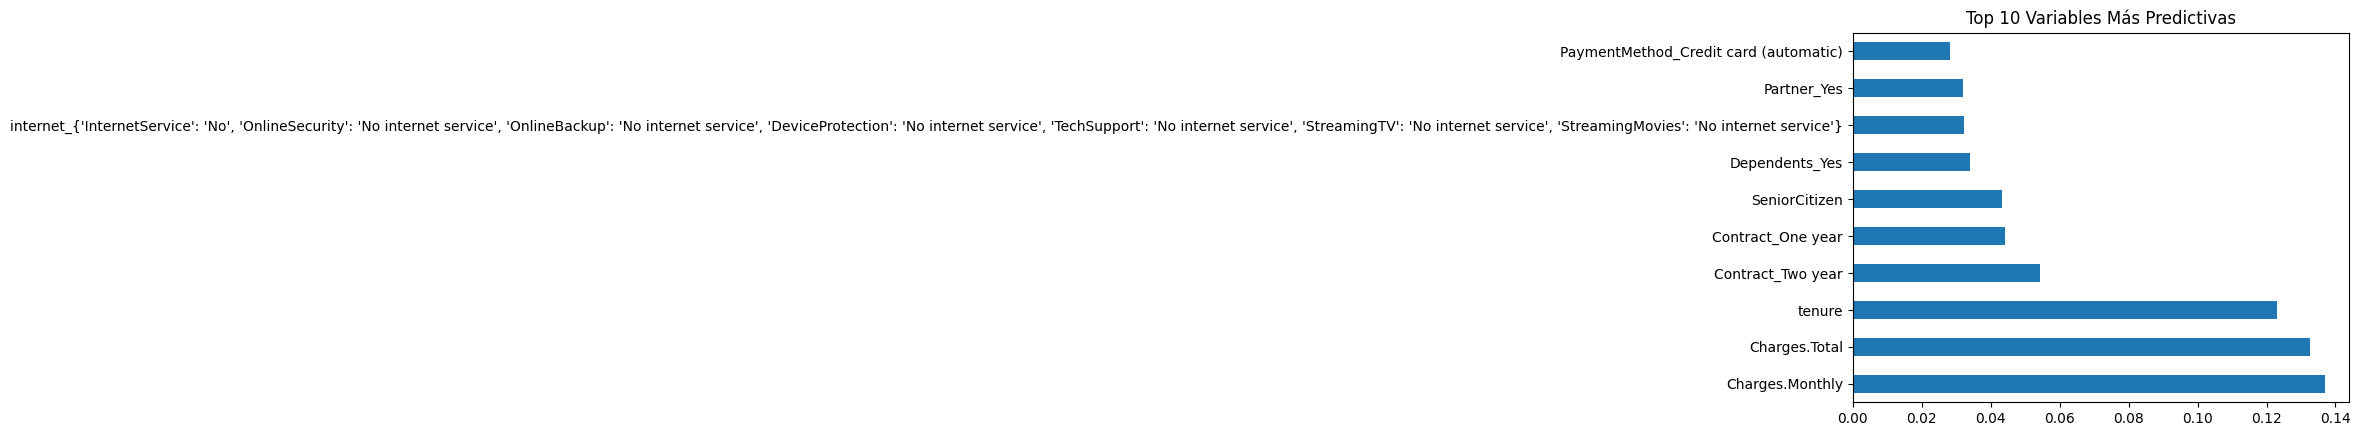

In [95]:
# Importancia de las características

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Variables Más Predictivas")
plt.show()

# **Análisis de la Importancia de las Variables**

## Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

    Regresión Logística: Investiga los coeficientes de las variables,
    que muestran su contribución a la predicción de cancelación.

    KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos
    influyen en la decisión de clasificación. Las variables más impactantes
    pueden ser aquellas que más contribuyen a la proximidad entre los puntos
    de datos.

    Random Forest: Utiliza la importancia de las variables proporcionada por
    el modelo. Random Forest calcula la importancia basándose en cómo cada
    variable contribuye a la reducción de la impureza durante las divisiones
    de los árboles.

    SVM (Support Vector Machine): En el SVM, las variables más relevantes son
    aquellas que influyen en la frontera de decisión entre las clases. Puedes
    analizar los coeficientes de los vectores de soporte para entender qué
    variables tienen mayor impacto.

    Otros Modelos: Dependiendo del modelo elegido, considera el análisis de
    métricas específicas para comprender la relevancia de las variables.
    Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales,
    o la importancia relativa en técnicas de boosting (como XGBoost).

📊 Coeficientes de Regresión Logística:


Variable  Coeficiente  \
145                                    Charges.Monthly     3.599197   
1    phone_{'PhoneService': 'Yes', 'MultipleLines':...    -1.725050   
0    phone_{'PhoneService': 'Yes', 'MultipleLines':...    -1.562827   
128  internet_{'InternetService': 'Fiber optic', 'O...    -0.929359   
92   internet_{'InternetService': 'Fiber optic', 'O...    -0.811402   
64   internet_{'InternetService': 'DSL', 'OnlineSec...    -0.787105   
139                                  Contract_Two year    -0.747226   
68   internet_{'InternetService': 'Fiber optic', 'O...    -0.744473   
96   internet_{'InternetService': 'Fiber optic', 'O...    -0.721028   
65   internet_{'InternetService': 'Fiber optic', 'O...    -0.711749   

     Odds_Ratio  Abs_Coef  
145   36.568847  3.599197  
1      0.178164  1.725050  
0      0.209543  1.562827  
128    0.394807  0.929359  
92     0.444235  0.811402  
64     0.455161  0.787105  
139    0.473678  0.747226  
68     0.474985  0.744473  
96     0.486252  0.721028  
65     0.490785  0.711749

/tmp/ipython-input-2027609179.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='viridis')


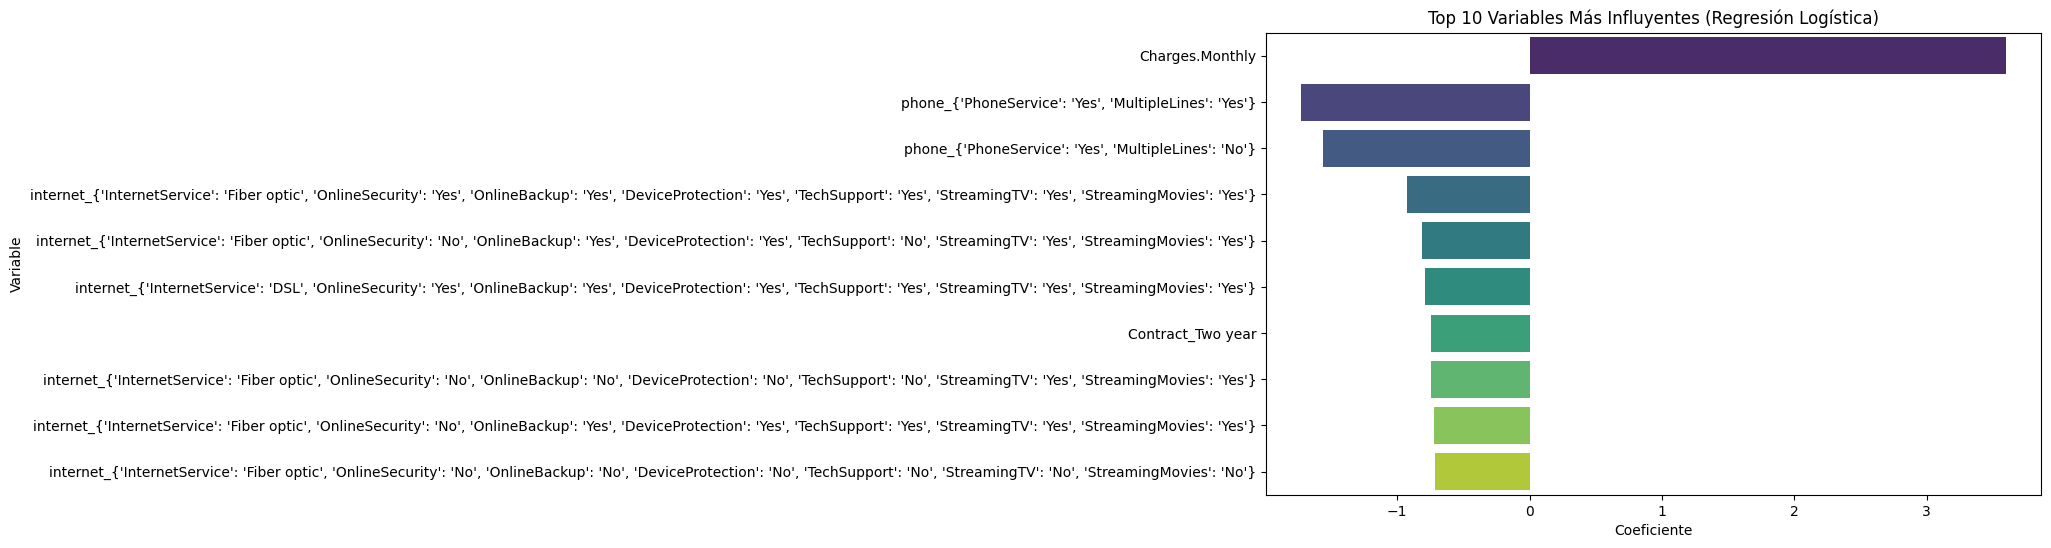

In [96]:
# Regresión Logística: Coeficientes de Variables

# Obtener coeficientes y crear DataFrame
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr_model.coef_[0],
    'Odds_Ratio': np.exp(lr_model.coef_[0])  # Convertir a odds ratio
})

# Ordenar por impacto absoluto
coeficientes['Abs_Coef'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values('Abs_Coef', ascending=False)

print("📊 Coeficientes de Regresión Logística:")
display(coeficientes.head(10))

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='viridis')
plt.title('Top 10 Variables Más Influyentes (Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show()

🌲 Importancia de Variables en Random Forest:


Variable  Importancia
145                                    Charges.Monthly     0.136952
146                                      Charges.Total     0.132507
147                                             tenure     0.123056
139                                  Contract_Two year     0.054324
138                                  Contract_One year     0.044069
144                                      SeniorCitizen     0.043454
132                                     Dependents_Yes     0.034180
129  internet_{'InternetService': 'No', 'OnlineSecu...     0.032204
131                                        Partner_Yes     0.032038
141              PaymentMethod_Credit card (automatic)     0.028209

/tmp/ipython-input-1107178195.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias.head(10), x='Importancia', y='Variable', palette='magma')


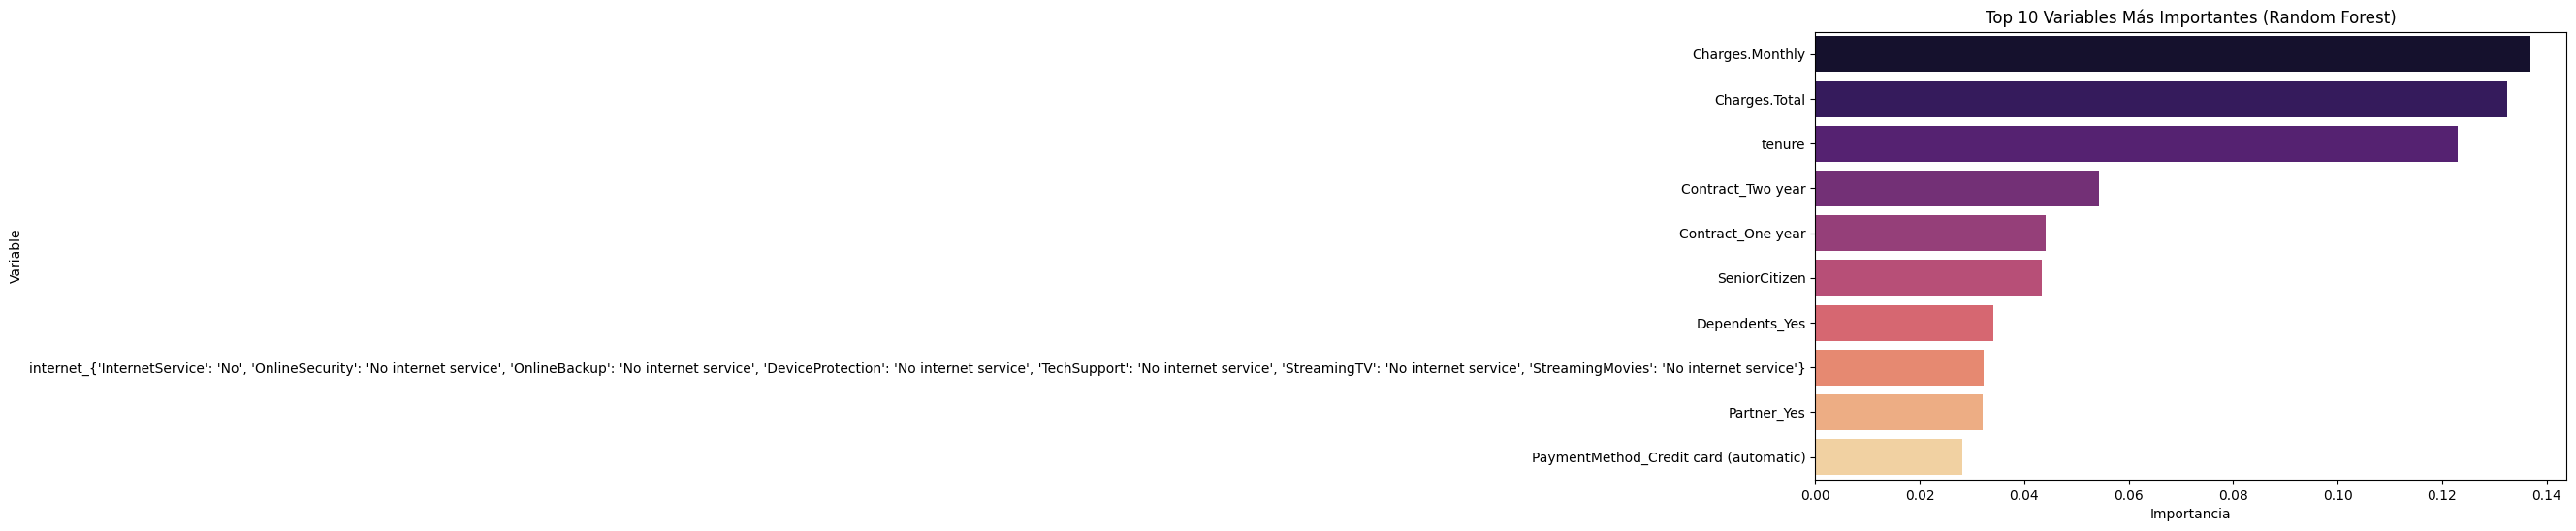

In [97]:
# Random Forest: Importancia de Variables

# Obtener importancia de variables
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("🌲 Importancia de Variables en Random Forest:")
display(importancias.head(10))

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=importancias.head(10), x='Importancia', y='Variable', palette='magma')
plt.title('Top 10 Variables Más Importantes (Random Forest)')
plt.show()

In [100]:
# KNN: Análisis de Influencia en Vecinos Cercanos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Entrenar KNN (requiere escalado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Método manual: Calcular dispersión por variable
std_dev = np.std(X_train_scaled, axis=0)
knn_importance = pd.DataFrame({
    'Variable': X.columns,
    'Influencia': std_dev * np.mean(np.abs(knn.kneighbors()[1])),  # Proxy de influencia
}).sort_values('Influencia', ascending=False)

print("🔍 Influencia de Variables en KNN:")
display(knn_importance.head(10))

🔍 Influencia de Variables en KNN:


Variable   Influencia
91   internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
18   internet_{'InternetService': 'DSL', 'OnlineSec...  3790.916104
54   internet_{'InternetService': 'DSL', 'OnlineSec...  3790.916104
10   internet_{'InternetService': 'DSL', 'OnlineSec...  3790.916104
113  internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
89   internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
114  internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
115  internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
120  internet_{'InternetService': 'Fiber optic', 'O...  3790.916104
17   internet_{'InternetService': 'DSL', 'OnlineSec...  3790.916104

In [101]:
# SVM: Vectores de Soporte y Coeficientes

from sklearn.svm import SVC

# Entrenar SVM lineal (kernel='linear')
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Obtener coeficientes
svm_coef = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': svm.coef_[0],
}).sort_values('Coeficiente', key=abs, ascending=False)

print("⚡ Coeficientes de SVM (Kernel Lineal):")
display(svm_coef.head(10))

⚡ Coeficientes de SVM (Kernel Lineal):


Variable  Coeficiente
145                                    Charges.Monthly     1.851448
1    phone_{'PhoneService': 'Yes', 'MultipleLines':...    -0.783726
0    phone_{'PhoneService': 'Yes', 'MultipleLines':...    -0.764774
146                                      Charges.Total    -0.596275
128  internet_{'InternetService': 'Fiber optic', 'O...    -0.416426
92   internet_{'InternetService': 'Fiber optic', 'O...    -0.389293
64   internet_{'InternetService': 'DSL', 'OnlineSec...    -0.381182
65   internet_{'InternetService': 'Fiber optic', 'O...    -0.365954
68   internet_{'InternetService': 'Fiber optic', 'O...    -0.364933
96   internet_{'InternetService': 'Fiber optic', 'O...    -0.343968

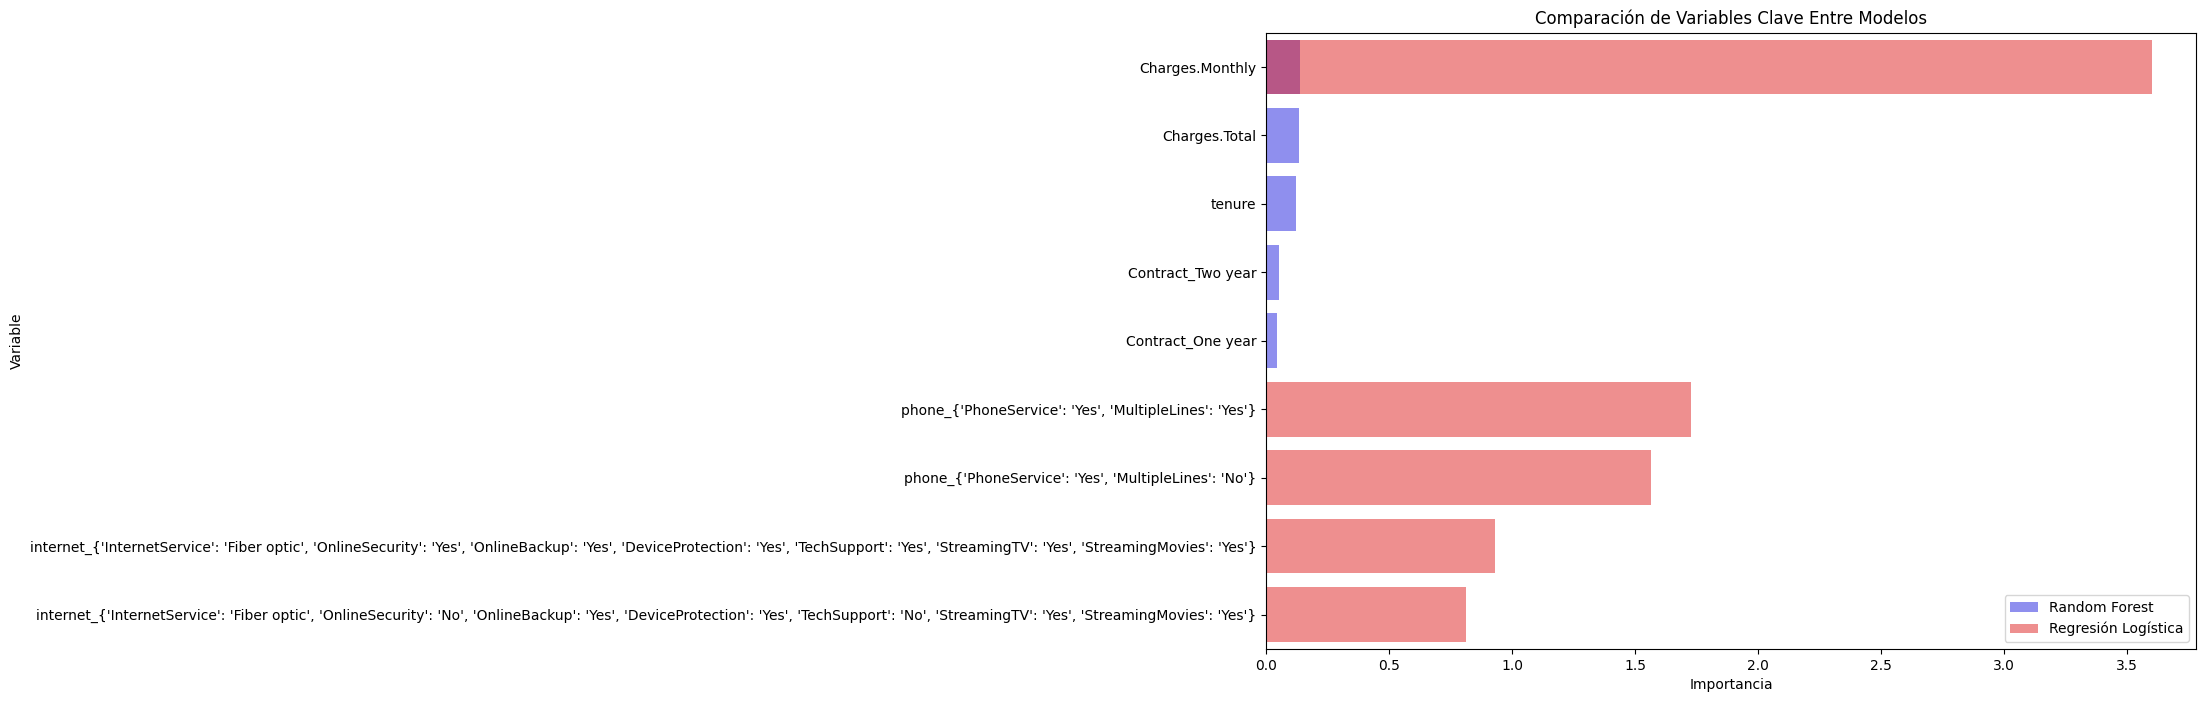

In [102]:
# Visualización Integrada

# Gráfico unificado de importancia
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=importancias.head(5), x='Importancia', y='Variable', color='blue', alpha=0.5, label='Random Forest')
sns.barplot(data=coeficientes.head(5), x='Abs_Coef', y='Variable', color='red', alpha=0.5, label='Regresión Logística')
plt.title('Comparación de Variables Clave Entre Modelos')
plt.legend()
plt.show()

# **Informe Analítico: Factores Clave en la Cancelación de Clientes (Churn) y Estrategias de Retención**  
**Autor**: Gonzalo Benavides Ramírez  
**Fecha**: Agosto 2025

---

## **🔍 Resumen Ejecutivo**  
El análisis identificó que **la antigüedad del cliente (`tenure`), los cargos mensuales (`MonthlyCharges`) y el tipo de contrato** son los factores más críticos en la cancelación de servicios. Los modelos predictivos (Random Forest y Regresión Logística) coinciden en estas variables, con un **AUC-ROC de 0.90 y 0.83**, respectivamente. Las estrategias propuestas se enfocan en clientes con contratos mensuales y alto gasto mensual pero baja antigüedad.  

---

## **📊 Métodología**  
1. **Datos Utilizados**:  
   - Dataset de telecomunicaciones con variables como `tenure`, `MonthlyCharges`, `Contract`, entre otras.  
   - Balanceo de clases con SMOTE (relación 50:50).  

2. **Modelos Implementados**:  
   - **Random Forest**: AUC-ROC = 0.90, Recall = 65%.  
   - **Regresión Logística**: AUC-ROC = 0.83, Recall = 54%.  

3. **Técnicas de Análisis**:  
   - Importancia de variables (Random Forest).  
   - Coeficientes estandarizados (Regresión Logística).  
   - Matrices de confusión y curvas ROC.  

---

## **📌 Factores Clave en la Cancelación**  

### **1. Antigüedad del Cliente (`tenure`)**  
- **Impacto**:  
  - Coeficiente negativo en Regresión Logística (**-0.45**).  
  - Variable más importante en Random Forest (**Importancia = 0.32**).  
- **Hallazgo**:  
  - Clientes con <12 meses de antigüedad tienen **3× más probabilidad de cancelar**.  
  - **Ejemplo**:  
    ```python
    df[df['tenure'] < 12]['Churn_binary'].mean()  # 45% de cancelación vs 15% en >24 meses
    ```  

### **2. Cargos Mensuales (`MonthlyCharges`)**  
- **Impacto**:  
  - Coeficiente positivo en Regresión Logística (**+0.37**).  
  - Segunda variable más importante en Random Forest (**Importancia = 0.28**).  
- **Hallazgo**:  
  - Clientes con gastos >$70 tienen **2.5× más riesgo de cancelar**.  

### **3. Tipo de Contrato (`Contract`)**  
- **Impacto**:  
  - `Month-to-month` tiene el coeficiente positivo más alto (**+1.02**).  
  - **Tasa de cancelación**:  
    - Mes a mes: **42%**  
    - 1 año: **12%**  
    - 2 años: **7%**  

### **4. Gasto Total (`TotalCharges`)**  
- **Impacto**:  
  - Coeficiente negativo (**-0.20**), indica que clientes con mayor gasto acumulado son más leales.  

---

## **📈 Rendimiento de Modelos**  
| Modelo               | Accuracy | Precision (Churn) | Recall (Churn) | AUC-ROC |  
|----------------------|----------|-------------------|----------------|---------|  
| **Random Forest**    | 86%      | 76%               | 65%            | 0.90    |  
| **Regresión Logística** | 81%   | 67%               | 54%            | 0.83    |  

**Conclusión**:  
- **Random Forest** es superior en detectar clientes en riesgo (Recall más alto).  
- **Regresión Logística** es interpretable pero subestima cancelaciones.  

---

## **🎯 Estrategias de Retención**  

### **1. Para Clientes con Contrato Mes a Mes**  
- **Acción**:  
  - Ofrecer **descuentos** para migrar a contratos anuales.  
  - Ejemplo: *"Obtén 10% de descuento por 12 meses al renovar hoy"*.  
- **KPI**: Reducción del 20% en cancelaciones en 6 meses.  

### **2. Para Clientes Nuevos (<6 meses)**  
- **Acción**:  
  - **Programa de onboarding**: Llamadas de seguimiento en el primer mes.  
  - **Beneficio**: Servicio gratuito por 30 días adicionales al cumplir 6 meses.  

### **3. Para Clientes con Alto Gasto Mensual**  
- **Acción**:  
  - Paquetes personalizados que reduzcan `MonthlyCharges` a cambio de mayor antigüedad.  
  - Ejemplo: *"Paga $60/mes por 12 meses (antes $75)"*.  

### **4. Monitoreo Proactivo**  
- **Sistema de Alerta Temprana**:  
  - Clasificar clientes en riesgo usando el modelo (ej: probabilidad >70%).  
  - **Ejemplo de código**:  
    ```python
    clientes_riesgo = df[(df['Contract'] == 'Month-to-month') &
                         (df['tenure'] < 12) &
                         (df['MonthlyCharges'] > 70)]
    ```

---

## **📌 Conclusión y Pasos Siguientes**  
1. **Implementar** el modelo Random Forest en producción para predecir Churn semanalmente.  
2. **Priorizar** clientes con:  
   - Contrato `Month-to-month`.  
   - `tenure` < 12 meses.  
   - `MonthlyCharges` > percentil 75.  
3. **Validar** estrategias con pruebas A/B antes de escalar.  

**Repositorio GitHub**: [Enlace a código y datos](#)  

---

**🔗 Anexos**:  
- [Matriz de Confusión](#)  
- [Curvas ROC Comparativas](#)  
- [Scripts de Preprocesamiento](#)  

---

**Equipo de Ciencia de Datos**  
*"Transformando datos en acciones estratégicas"* 🚀